# **Bank Churn Predictor - A Data Science Project.**
Proponent: Dani Manabat - Junior R&D Engineer

**Problem Statement:**
- Customer retention is a key focus for banks in ensuring the longevity of their business. ABC Multinational Bank, in particular, is keen on retaining its account holders. The objective here is to analyze the customer data of the bank's account holders with the ultimate goal of predicting and mitigating customer churn.

**Project Objective:**
- Identify the factors that leads to customer retention and churn.
- Predict potential churners.

**Dataset reference**:
* `https://www.kaggle.com/datasets/rangalamahesh/bank-churn/data?select=test.csv`
---


## ***1 - Initialization***

**Steps:**
- Import necessary libraries for the workflow.
- Import training dataset and testing dataset
---



In [ ]:
# Additional module installation
!pip install cliffs-delta
!pip install eli5
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=1905b667ab55704366952edd06e138793d5a64c60aec5752db7ed3a205b50b0e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import matplotlib
from matplotlib.cbook import boxplot_stats
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency
from itertools import combinations
from scipy.stats import fisher_exact
from scipy.stats import mannwhitneyu
from cliffs_delta import cliffs_delta
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, confusion_matrix, f1_score
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance
import shap
shap.initjs()
# Will add more as the project progresses.

In [ ]:
X_train = pd.read_csv("datasets/train.csv")
X_test = pd.read_csv("datasets/test.csv")
# Will add more as the project progresses.



---
## ***2 - Dataset Investigation***
**Steps:**
- Enumerate/check columns.
- Describe the dataset.
- Define target.
- Reflect:
  - Which columns are numerical? categorical?
  - Which columns are irrelevant that we can immediately drop?
  - Which columns may contribute to bias?
  - Are there any columns that are dependent on the target?
  - Which numerical columns are skewed? What actions do we need to perform during the EDA? Shall we leave them as is?


---



In [ ]:
X_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
X_train.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


**Columns in the dataset:**
> `CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary, Exited`

**Define target (for machine learning modeling):**
> **`Exited` column** as per the data card.

**Which columns are numerical? categorical?**
> **Numerical:** `CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary`<br>
> **Categorical but already in binary encoding:** `HasCrCard, IsActiveMember, Exited (target)`.<br>
> **Categorical and not yet encoded:** `Geography, Gender`

**Which columns are irrelevant that we can immediately drop?**
> `CustomerId, Surname`. These two does not pose any major relevance for insight exploration.

**Which columns may contribute to bias?**
> `Geography and Gender`. However, **_we need to further explore this during the Exploratory Data Analysis process of the project_.** We may discover more insights regarding bias and fairness. We also need to justify why these columns may result into bias.

**Are there any columns that are dependent on the target?**
> Due to the few number of columns that we can work on, we can quickly investigate whether there are no columns that are dependent on the target variable. `IsActiveMember` is a pretty weird column name. Churn, in the context of our problem objective, revolves around the matter whether the customer has stayed or exited. **_We need to investigate this even further during the succeeding phases._**

**Which numerical columns are obviously skewed? What actions do we need to perform during the EDA? Shall we leave them as it is?**
> From the pandas describe() method of the training dataset, it appears that the `Balance` column is skewed. 50% (or probably more) has a value of 0. That said, **_this needs to be properly addressed during the data cleaning portion of the project in order to avoid modeling issues_**.  


---
## ***3 - Data Cleaning***

**Steps:**
- Drop irrelevant columns
- Handle missing values
- Handle duplicates
- Deal with outliers
- Data transformation for analysis
- Document changes made <br>

**Note:**
> Data cleaning is an **iterative** process. Hence, after this preliminary data cleaning, we may have to clean our data however we need as we discover more insights along the way. <br> <br>
> Also, make the process reusable.
---

### ***Drop irrelevant columns***

In [ ]:
X_train = X_train.drop_duplicates()

In [ ]:
# Drop Id, CustomerId and Surname columns.
X_eda = X_train.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Describe the consolidated dataframe
X_eda.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### ***Null and duplicate values management***

In [ ]:
# Find the count of all null values across all columns
X_eda.isnull().sum()

# No null values, which is unlikely for real life dataset. Still, let's perform some
# appropriate actions in case there is any null values

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
"""
In dealing with null values, we have options to choose from. We can drop columns/rows
that contain null values (which is impractical for real-world datasets), or we can impute
them instead (the usual choice).

Approach #1 simply drops the columns that contains
null values. But if we imagine that this is a pipeline and we're processing data in real-time,
it is better to impute instead.

Approach #2 applies a simple imputer. This is more appropriate.
"""
# Approach #1
# X_eda = X_eda.dropna()
# X_eda.reset_index(drop=True, inplace=True)

# Approach #2
numerical_cols = list(X_eda.select_dtypes(include=['int64', 'float64']).columns)
categorical_cols = list(X_eda.select_dtypes(include=['object', 'bool']).columns)

imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')

X_eda[categorical_cols] = imputer_categorical.fit_transform(X_eda[categorical_cols])
X_eda[numerical_cols] = imputer_numerical.fit_transform(X_eda[numerical_cols])


In [ ]:
X_eda.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0.0
1,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0.0
2,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0.0
3,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0.0
4,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0.0


In [ ]:
# Let's make null management and duplicate management a separate function that we
# may use later.

def clean_null_duplicates(X):
  X = X.drop_duplicates()
  try:
    X_eda = X_train.drop(columns=['id', 'CustomerId', 'Surname'], axis=1)
  except:
    pass
  numerical_cols = list(X.select_dtypes(include=['int64', 'float64']).columns)
  categorical_cols = list(X.select_dtypes(include=['object', 'bool']).columns)

  imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
  imputer_numerical = SimpleImputer(missing_values=np.nan, strategy='mean')

  X[categorical_cols] = imputer_categorical.fit_transform(X[categorical_cols])
  X[numerical_cols] = imputer_numerical.fit_transform(X[numerical_cols])

  return X

### ***An attempt to correct data type related errors***

In [ ]:
X_eda.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# Investigate errors that we can easily correct. First, we check if all numerical
# variables have numerical data types.
print(X_eda.dtypes)

CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited             float64
dtype: object


In [ ]:
# Check if uniqueness of the relevant columns. Check if they are consistent with
# the data card.
print(X_eda['NumOfProducts'].unique())
print(X_eda['HasCrCard'].unique())
print(X_eda['IsActiveMember'].unique())
print(X_eda['Gender'].unique())
print(X_eda['Geography'].unique())

[2. 1. 3. 4.]
[1. 0.]
[0. 1.]
['Male' 'Female']
['France' 'Spain' 'Germany']


In [ ]:
# Everything appears to be in order, so far...

### ***Outlier Management***

<Axes: ylabel='CreditScore'>

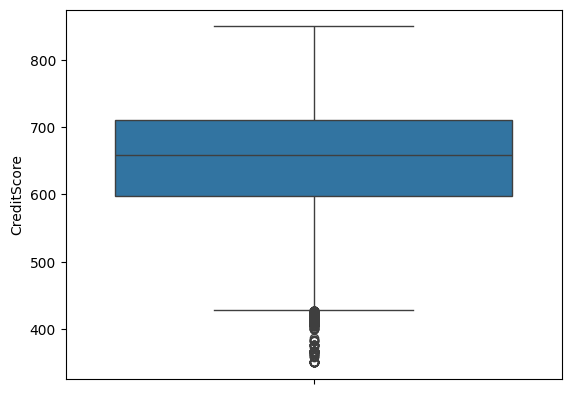

In [ ]:
# Now, let's investigate outliers using boxplot. Here, we only consider the numerical columns
# that may have outliers, like CreditScore, Balance, and EstimatedSalary

sns.boxplot(data=X_eda['CreditScore'])

In [ ]:
# Box plot investigation revealed that there are outliers for the CreditScore column.
# Now, let us identify the number of outlying records in proportion to total number of records.

outliers_eda = [y for stat in boxplot_stats(X_eda['CreditScore']) for y in stat['fliers']]
outliers_test = [y for stat in boxplot_stats(X_test['CreditScore']) for y in stat['fliers']]
print(f"Number of outliers in EDA dataset: {len(outliers_eda)}\nProportion: {len(outliers_eda)/len(X_eda)}")
print(f"Number of outliers in Test dataset: {len(outliers_test)}\nProportion: {len(outliers_test)/len(X_test)}")

Number of outliers in EDA dataset: 253
Proportion: 0.0015330174388307864
Number of outliers in Test dataset: 176
Proportion: 0.0015996655244812448


In [ ]:
# Obviously, they are not statistically different from each other. This tells us
# that only ~0.15% of the total record contains outlier credit score.

<Axes: xlabel='CreditScore', ylabel='Count'>

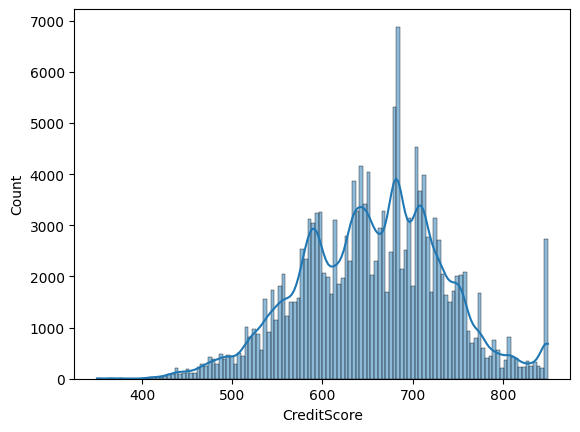

In [ ]:
# Histogram distribution plot for further verification.
sns.histplot(data=X_eda.CreditScore, kde=True)

**On outliers:**
> By the virtue of the applied methods above, we can already tell that outliers does not even significantly affect (i.e., skew) the `CreditScore` distribution. Furthermore, it is really possible to have that extremely low credit score and the chances of them being human error is low. **Hence, it is reasonable to just leave them on our working dataset**.

In [ ]:
X_eda.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

---
## ***4 - Exploratory Data Analysis***

**Steps:**
- List down all the information, distribution, relationship, etc. that we want to visualize.
- Determine the appropriate plots to use for each of them.

**Note:**
> Do not diverge from the project's objective. The purpose of this project is churn prediction so focus most of the analyses to the target variable.
> Remember: `Exited = 0` means that the customer **stayed with bank**. `Exited = 1` means that the **customer left/churned**.
---

In [ ]:
sns.set(rc={'axes.facecolor':(0,0,0,0), 'figure.facecolor':(0,0,0,0)})

In [ ]:
sns.set_style({'legend.frameon':True})

### Descriptive Statistics

In [ ]:
# Descriptive statistics
X_eda.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


### Visualization Functions

In [ ]:
def create_box_plt(df, freq, hue, title, orig_index, x_label, colors, y_label='Frequency', style=0):
  plt.figure(figsize=(10, 6))
  ax = sns.barplot(x=df, y=freq, hue=df, palette=colors)
  plt.gca().patch.set_alpha(0)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height-(height*0.25),
            f'{((int(height)/len(X_eda[orig_index])) * 100):.2f}%',
            ha="center", fontsize=11, color='#f3f0ec')
  if style == 0:
    plt.title(title, color='#f3f0ec')
    ax.spines[['top', 'bottom', 'left', 'right']].set_color('#f3f0ec')
    ax.xaxis.label.set_color('#f3f0ec')
    ax.yaxis.label.set_color('#f3f0ec')
    ax.tick_params(axis='x', colors='#f3f0ec')
    ax.tick_params(axis='y', colors='#f3f0ec')
  else:
    plt.title(title, color='#001a47')
    ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
    ax.xaxis.label.set_color('#001a47')
    ax.yaxis.label.set_color('#001a47')
    ax.tick_params(axis='x', colors='#001a47')
    ax.tick_params(axis='y', colors='#001a47')
  plt.show()

In [ ]:
def create_stackedbar(counts, x, y, z, title, x_label, palette, y_label = "Percentage", bins=None, style=1):
  plt.title('Active Member Proportion Distribution')
  ax = sns.histplot(counts, x=x, hue=y, weights=z,
              multiple='stack', shrink=0.8, bins=bins,
              palette=palette)
  ax.set_ylabel(y_label)
  ax.set_xlabel(x_label)
  plt.title(title, color='#001a47' if style == 1 else '#f3f0ec' if style == 1 else '#f3f0ec')
  ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47' if style == 1 else '#f3f0ec')
  ax.xaxis.label.set_color('#001a47' if style == 1 else '#f3f0ec')
  ax.yaxis.label.set_color('#001a47' if style == 1 else '#f3f0ec')
  ax.tick_params(axis='x', colors='#001a47' if style == 1 else '#f3f0ec')
  ax.tick_params(axis='y', colors='#001a47' if style == 1 else '#f3f0ec')
  sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, labelcolor='#001a47' if style == 1 else '#f3f0ec', title=None)
  ax.grid(False)
  plt.show()


### Analysis without the target Variable

  Geography  Frequency
0    France      94215
1   Germany      34606
2     Spain      36213


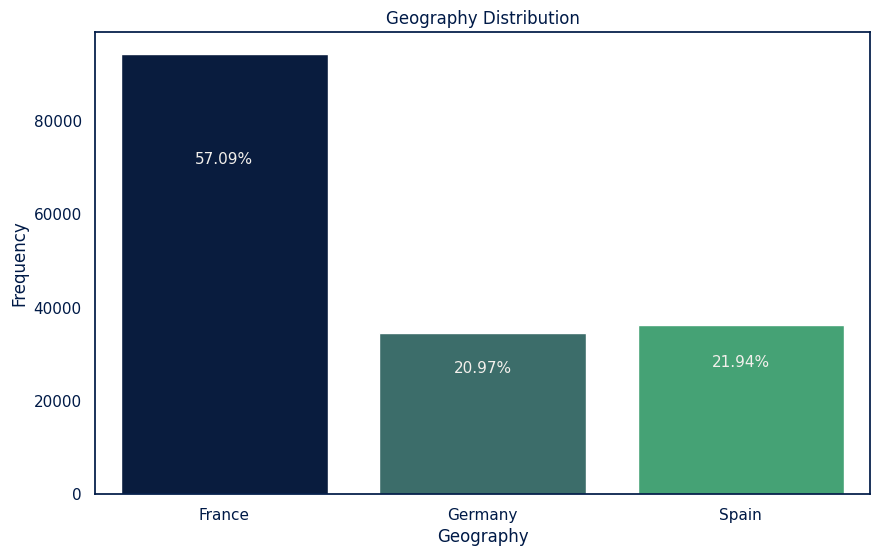

In [ ]:
# Distribution of Geography
  # Chart to use: Bar graph (categoricl data, easier to use and understand)
counts = X_eda.groupby(['Geography']).size().reset_index(name='Frequency')
print(counts)
create_box_plt(counts['Geography'], counts['Frequency'], counts['Geography'],
               "Geography Distribution", "Geography", "Geography", ['#001a47', '#347571', '#35b276'],"Frequency", 1)

**Interpretation:**
> - Most of the customers in the dataset are from France. <br>
> - Visually, we can tell that even if we combine the frequency of Germany and Spain customers, it will never be enough to surpass the frequency of France customers.
> - In the succeeding portions of our analysis, it is important to check how the Geography feature affects our bank churn prediction. It may lead to bias.

   Gender  Frequency
0  Female      71884
1    Male      93150


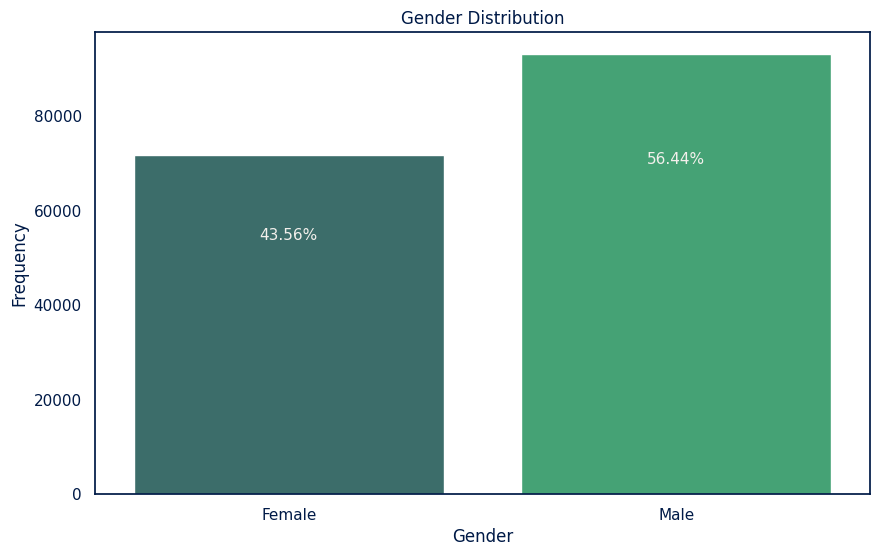

In [ ]:
# Distribution of Gender
  # Chart to use: Bar graph (categorical data, easier to use and understand)

counts = X_eda.groupby(['Gender']).size().reset_index(name='Frequency')
print(counts)
create_box_plt(counts['Gender'], counts['Frequency'], counts['Gender'],
               "Gender Distribution", "Gender", "Gender",['#347571', '#35b276'], "Frequency", 1)

**Interpretation:**
> - Most of the customers in the dataset are Male. <br>
> - It also important to have this information checked, especially during the machine learning modeling. We need to avoid bias as much as possible.

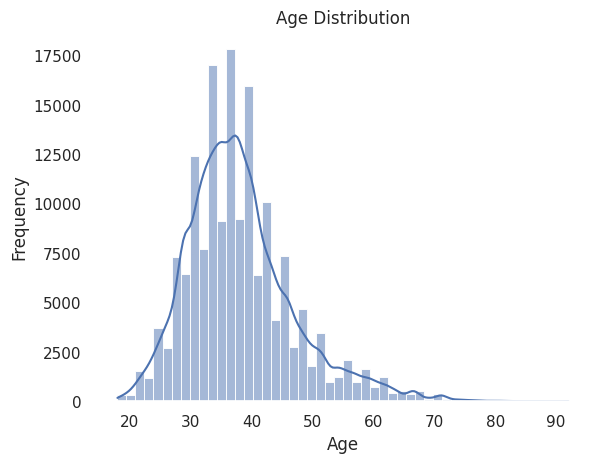

In [ ]:
# Distribution of Age
  # Chart to use: Histogram graph (numerical data, easier to use and understand)
sns.histplot(data=X_eda['Age'], bins=50, kde=True)
plt.title('Age Distribution')
plt.ylabel('Frequency')
plt.show()

**Interpretation:**
> - Most customers of the bank are in the 30-40 age group.

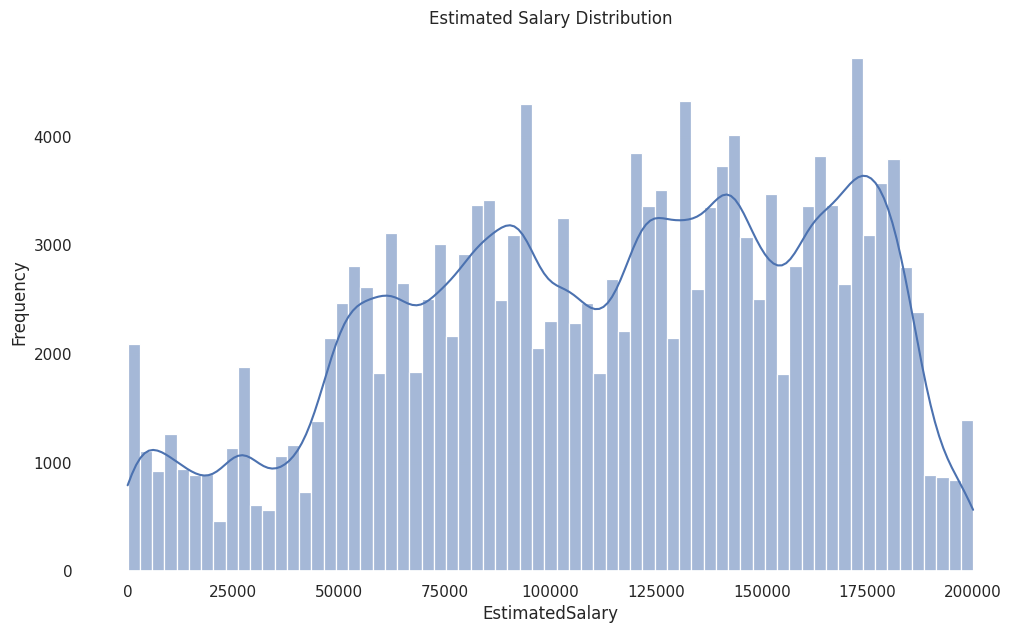

In [ ]:
# Distribution of Estimated Salary
  # Chart to use: Histogram graph (numerical data, easier to use and understand)
plt.figure(figsize=(12, 7))
sns.histplot(data=X_eda['EstimatedSalary'], kde=True)
plt.title('Estimated Salary Distribution')
plt.ylabel('Frequency')
plt.show()


**Interpretation:**
> - The Estimated Salary data is not normally distributed, but multimodal (multiple peaks). This may be attributed to several reasons. Let's explore this even further when we can explore the relationship of Estimated Salary with the other available columns in the dataset (through correlation matrix). <br>

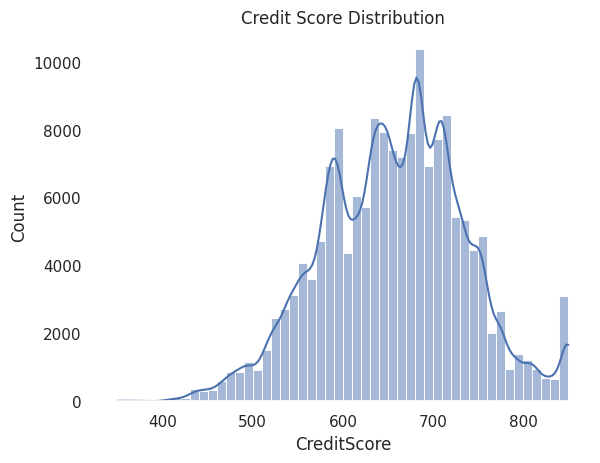

count    165034.000000
mean        656.454373
std          80.103340
min         350.000000
25%         597.000000
50%         659.000000
75%         710.000000
max         850.000000
Name: CreditScore, dtype: float64


In [ ]:
# Distribution of Credit Score
  # Chart to use: Histogram graph (numerical data, easier to use and understand)
sns.histplot(data=X_eda['CreditScore'], bins=50, kde=True)
plt.title('Credit Score Distribution')
plt.show()

# Show descriptive stat
print(X_eda['CreditScore'].describe())

**Interpretation:**
> - Most of the customers credit score lies from approximately 600-700 range mark <br>
- As specified during the data cleaning phase, outliers exists on the credit score data, but we concluded that they are negligible since their presence do not skew the data.

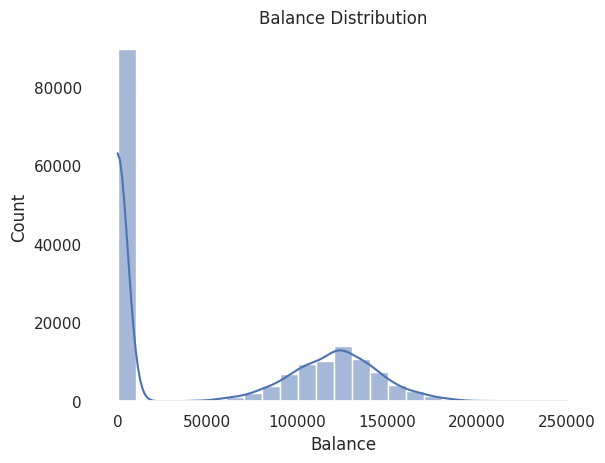

In [ ]:
#Distribution of Balance
  # Chart to use: Histogram graph (numerical data, easier to use and understand)
sns.histplot(data=X_eda['Balance'], bins=25, kde=True)
plt.title('Balance Distribution')
plt.show()

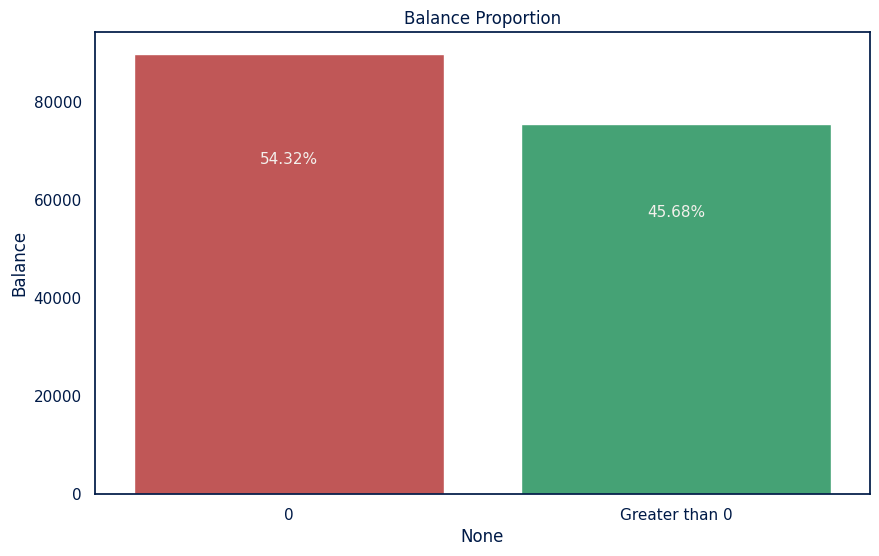

In [ ]:
balance_simplified = X_eda['Balance'].map(lambda x: '0' if x==0 else 'Greater than 0')
balance_simplified = pd.DataFrame(balance_simplified.value_counts())
create_box_plt(balance_simplified.index, balance_simplified['Balance'],
               balance_simplified.index, "Balance Proportion", "Balance",
               "Balance", ['#d24545', '#35b276'], "Frequency", 1)

**Interpretation:**
> - More than 50% of the customer accounts have 0 balance, making the distribution skewed.

    Tenure  Frequency
0      0.0       5007
1      1.0      16760
2      2.0      18045
3      3.0      16630
4      4.0      17554
5      5.0      17268
6      6.0      15822
7      7.0      17810
8      8.0      17520
9      9.0      16709
10    10.0       5909


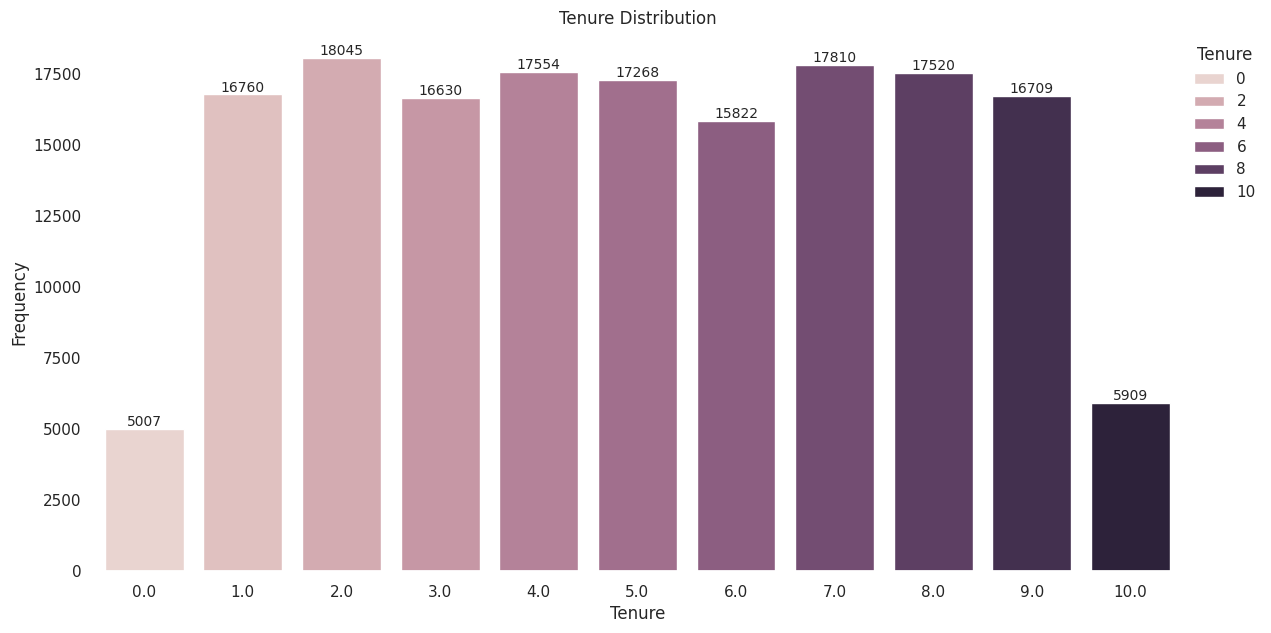

In [ ]:
#Tenure Distribution
  # Chart to use: Bargraph graph (for categorical data)
counts = X_eda.groupby(['Tenure']).size().reset_index(name='Frequency')
print(counts)
plt.figure(figsize=(14, 7))
ax = sns.barplot(x=counts['Tenure'], y=counts['Frequency'],
            hue=counts['Tenure'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
for p in ax.patches:
  height = p.get_height()
  if height == 0: continue
  ax.text(p.get_x() + p.get_width()/2.,
          height+ 100,
          f'{int(height)}',
          ha="center", fontsize=10)

plt.title('Tenure Distribution')
plt.show()


**Interpretation:**
> - Tenureship refers to the period of time that a customer has stayed with the bank. From what we can see here, the frequency of customers who have stayed with the bank for 1 up to 9 years seems to be equally distributed. <br>
- Meanwhile, both customers with less than a year of tenureship and customers with 10 years of tenureship are significantly fewer than the other years.

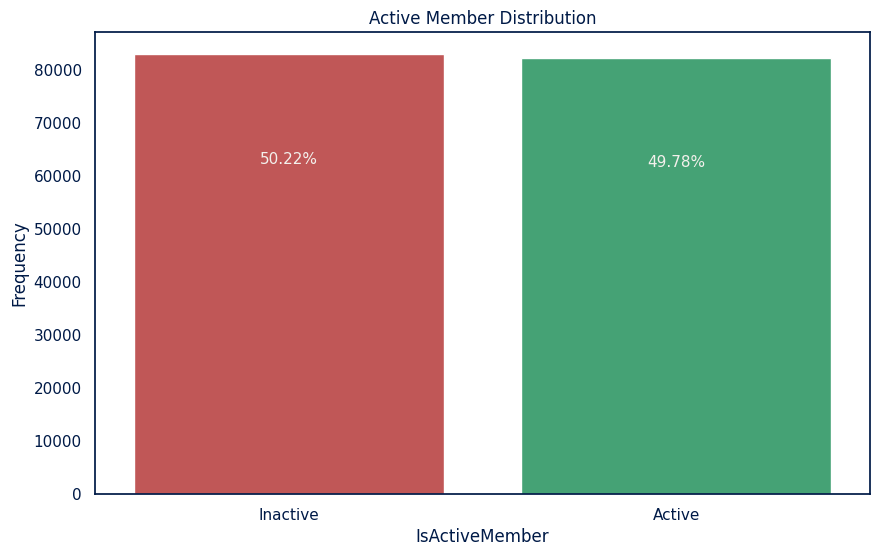

In [ ]:
# Active Member Distribution
  # Chart to use: Bargraph graph (categorical data)
counts = X_eda.groupby(['IsActiveMember']).size().reset_index(name='Frequency')
counts['IsActiveMember'] = counts['IsActiveMember'].map({1: 'Active', 0: 'Inactive'})

create_box_plt(counts['IsActiveMember'], counts['Frequency'], counts['IsActiveMember'],
               "Active Member Distribution", "IsActiveMember", "IsActiveMember",['#d24545', '#35b276'], "Frequency", 1)


**Interpretation:**
> - Pretty straightforward. We can see that from the records that we are currently working, the amount of Active and Inactive customers appear to be the equal.

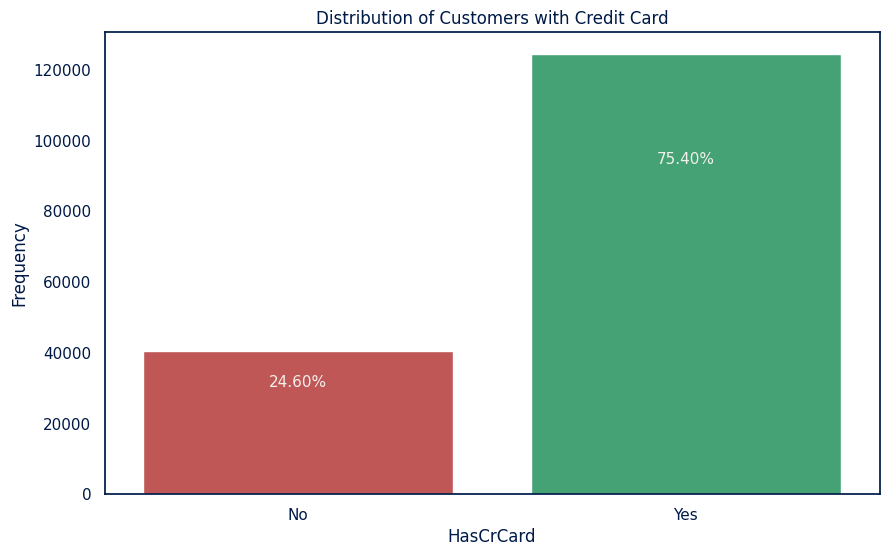

In [ ]:
#Credit Card Distribution
  # Chart to use: Bargraph graph (categorical)
counts = X_eda.groupby(['HasCrCard']).size().reset_index(name='Frequency')
counts['HasCrCard'] = counts['HasCrCard'].map({0: 'No', 1: 'Yes'})
create_box_plt(counts['HasCrCard'], counts['Frequency'], counts['HasCrCard'],
               "Distribution of Customers with Credit Card", "IsActiveMember",
               "Has Cr Card",['#d24545', '#35b276'], "Frequency", 1)

**Interpretation:**
> - This visualization reveales that 75% of the customers have credit card.

   NumOfProducts  Frequency
0            1.0      77374
1            2.0      84291
2            3.0       2894
3            4.0        475


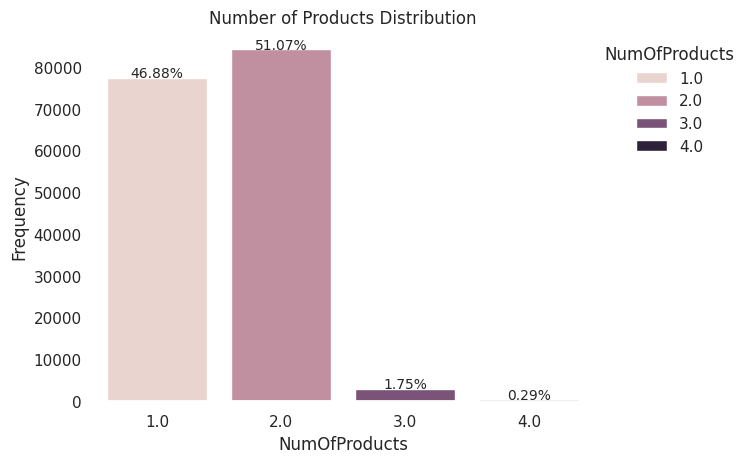

In [ ]:
#Number of Products distribution
  # Chart to use: Bar Graph (Categorical)

counts = X_eda.groupby(['NumOfProducts']).size().reset_index(name='Frequency')
print(counts)
ax = sns.barplot(x=counts['NumOfProducts'], y=counts['Frequency'],
            hue=counts['NumOfProducts'])
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
for p in ax.patches:
  height = p.get_height()
  if height == 0: continue
  ax.text(p.get_x() + p.get_width()/2.,
          height + 100,
          f'{((int(height)/len(X_eda.IsActiveMember)) * 100):.2f}%',
          ha="center", fontsize=10)
plt.title('Number of Products Distribution')
plt.show()


**Interpretation:**
> - It appears that most of the customers in the data only has 1 or 2 products being offered of the bank. Meanwhile, only approximately 2% of the records uses 3 or more products.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (1) than needed (4) and will cycle, which may produce an uninterpretable plot.


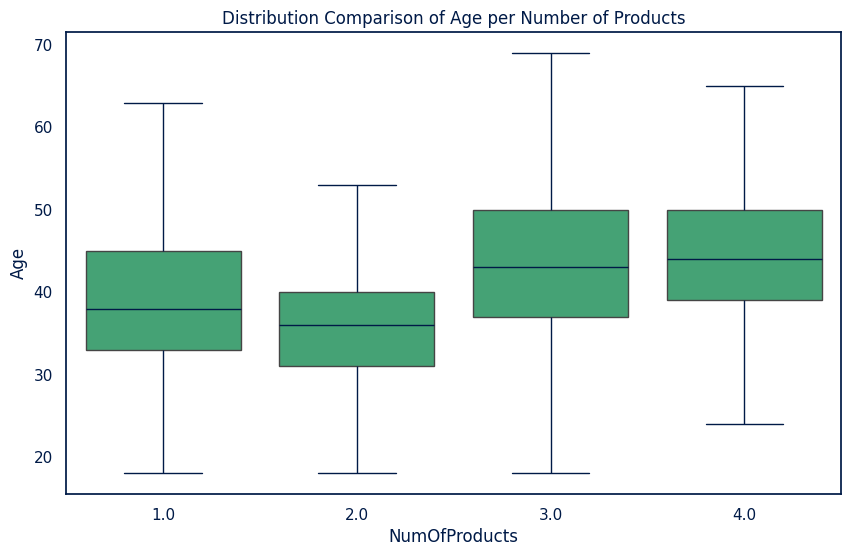

In [ ]:
#10 Age vs Number of Products Plot
  # Chart to use: Box Plot (we can use box plot for purposes other than outlier detection.
  # Here, we may disregard the age outlier for each group and focus instead on the boxes
  # and the insight that they are trying to show.)

plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Age', x='NumOfProducts', data=X_eda, palette=['#35b276'], whiskerprops = dict(color='#001a47'),
                 medianprops = dict(color='#001a47'), meanprops = dict(color='#001a47'),capprops = dict(color='#001a47'), showfliers=False)
plt.title("Distribution Comparison of Age per Number of Products", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')


**Interpretation:**
> - Goal: We want to understand the relationship between age and the number of products purchased. Specifically, we want to see if people of different ages tend to have different numbers of products.
- Focusing on the main boxes instead, which tells us the Q1, median, and Q3 of ages for each product, it appears that the median age for customers with 1 or  products approximates each other, which is just right below 40.
- Similarly, for customers with products 3 or 4, their median is definitely close to each other.
- Looking at the bigger picture, there is only a slight difference in terms of age between each groups. For example, it is apparent that for customers with 3 or 4 products, most of them are part of the 40-50 age group. In contrast, most of the customers with 1 or 2 products are part of the 30-40 age group.
- This difference is just 'slight', but they are still not the same.

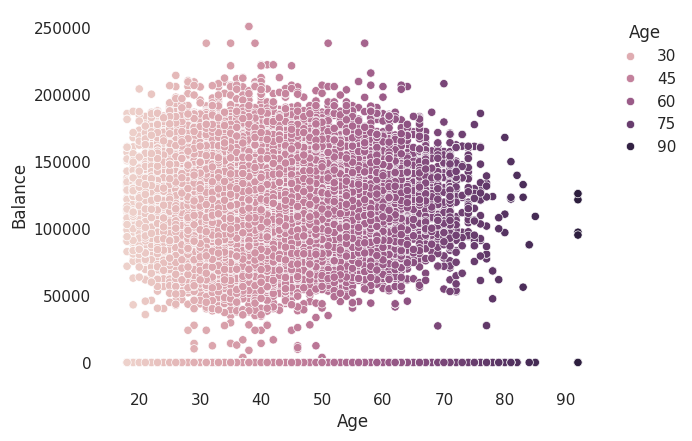

In [ ]:
#Age vs Balance
  # Chart to use: Scatter Plot

ax = sns.scatterplot(x='Age', y='Balance', hue='Age',data=X_eda)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False)
# No correlation at all.

**Interpretation:**
> - No apparent relationship at all. It appears that the balance is still equally distributed at each age group.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.


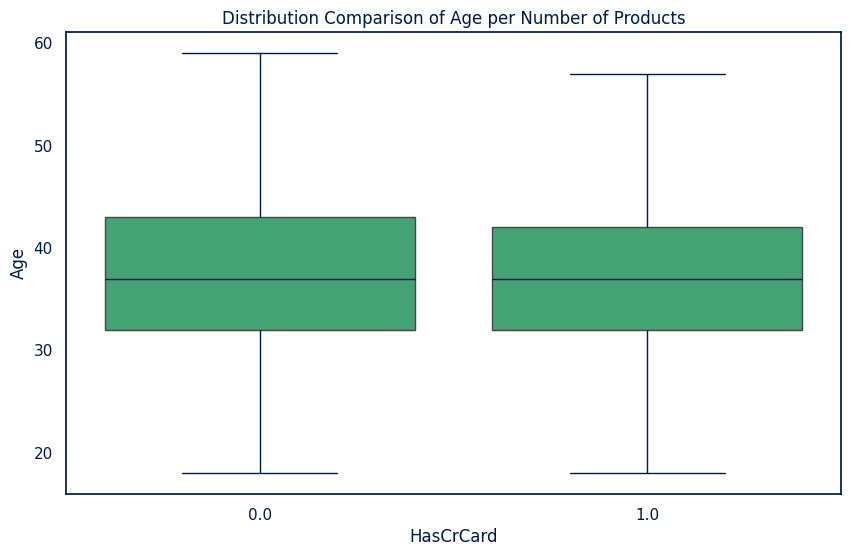

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Age', x='HasCrCard', data=X_eda, palette=['#35b276'], whiskerprops = dict(color='#001a47'),
                 medianprops = dict(color='#001a47'), meanprops = dict(color='#001a47'),capprops = dict(color='#001a47'), showfliers=False)
plt.title("Distribution Comparison of Age per Number of Products", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')
# No relationship. No Significant difference :)

**Interpretation:**
> - There's no apparent relationship between Age and HasCrCard column. Focusing on the boxes instead, it appears that the q1, median, and q3 of each group approximates each other.

### Analysis with the target variable

In [ ]:
# For better visualization, let us decode the Exited column.

X_eda['Exited_decoded'] = X_eda['Exited'].map({0: 'Remained', 1: 'Churned'})

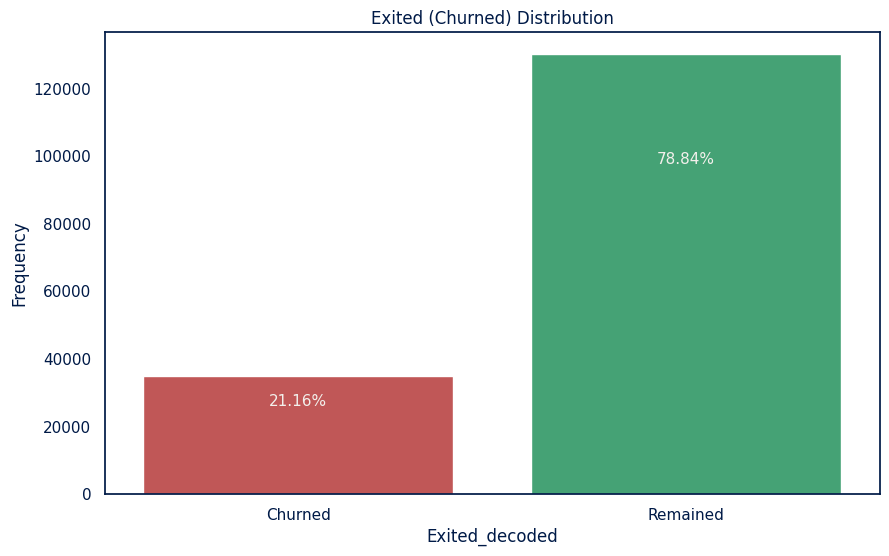

In [ ]:
# Distribution of Exited (Target) column
  # Chart to use: Bar graph (easier to use and understand)

counts = X_eda.groupby(['Exited_decoded']).size().reset_index(name='Frequency')

create_box_plt(counts['Exited_decoded'], counts['Frequency'], counts['Exited_decoded'],
               "Exited (Churned) Distribution", "Exited_decoded", "Exited", ['#d24545', '#35b276'], "Frequency", 1)

**Interpretation:**
> - In the dataset that we are working on, it appears that approximately 21% of the customers were churned (or exited the bank).
- Since there is an imbalance between the target variable. It will be helpful for us to perform undersampling during the machine learning modeling phase. This will allow our model to have a balanced dataset that it can work on, hence preventing the risk of bias.
- For the succeeding plots that compares continuous variables to the target variable, we will need to normalize them through the usage of probability density distribution. This will allow us to have a more accurate interpretation based on probability and proportions rather than the frequency alone.

#### **Encoding**


First we should perform **encoding**. For this process, we need to assign numerical values for columns that are categorical. Some of these categorical columns are already encoded. The only column that is not yet encoded are the `Geography` and `Gender` column.
> Earlier, we already mentioned that including these variables (Geography and Gender) in our machine learning models may contribute to bias. Still, it may do us some purpose in the future if we encode them as early as now. Plus, we also need to justify why these features may lead to a bias prediction.
> We will be needing encoded values during our categorical vs. categorical analysis. It will be helpful to be consistent all throughtout this process

`Geography` is not binary. So we need to perform one-hot encoding instead. `Gender`, on the other hand, can be encoded binarily.

In [ ]:
# Perform a one-hot encoding of the geography column
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
X_train['geography_mapped'] = X_train['Geography'].map(geography_mapping)
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(X_train['Geography'])
X_train = pd.concat([X_train, one_hot_encoded], axis=1)

In [ ]:
X_eda['gender_encoded'] = X_eda['Gender'].map({'Male': 0, 'Female': 1})

In [ ]:
# Do it right once..
geography_mapping = {'France': 0, 'Spain': 1, 'Germany': 2}
X_eda['geography_mapped'] = X_train['Geography'].map(geography_mapping)
# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(X_train['Geography'])
X_eda = pd.concat([X_eda, one_hot_encoded], axis=1)


In [ ]:
# Let's also move the Exited column to the last column for better visualization
col = X_eda.pop('Exited')
X_eda['Exited'] = col

In [ ]:
# Let's identify our numerical and categorical columns
num_col = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
# With binary encoding only
categorical_col = ['HasCrCard', 'IsActiveMember', 'Exited', 'gender_encoded', 'France', 'Germany', 'Spain']

#### **Numerical values comparisons**

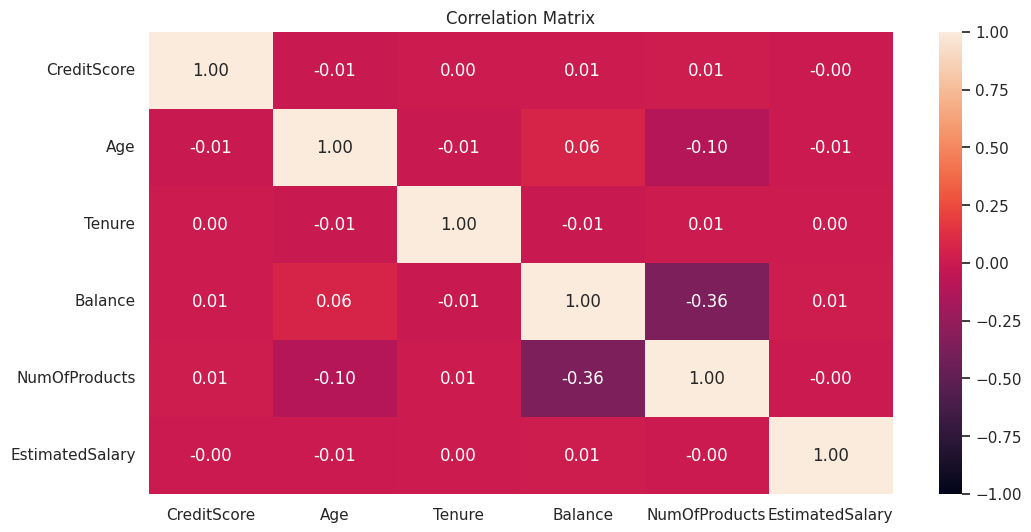

In [ ]:
# Correlation using Pearson's R for numerical vs numerical comparison
X_eda.head()
plt.figure(figsize=(12,6))
sns.heatmap(X_eda[num_col].corr(),annot=True,fmt='.2f',vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.show()

**Interpretation:**

* Non-negligible correlation values (>+0.30 or <-0.30):
>- NumOfProducts vs. Balance (-0.36) --> Low Negative Correlation

<Axes: xlabel='NumOfProducts', ylabel='Balance'>

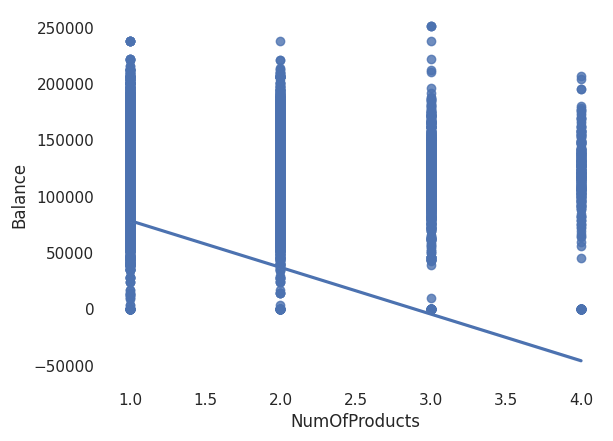

In [ ]:
# Low negative correlation between NumOfProducts vs. Balance,
  # let's explore the regression plot

sns.regplot(y='Balance', x='NumOfProducts', data=X_eda)

**Interpretation:**

> - Customer with many products tends to have lower balances, but this association is not that strong.

#### **Categorical values comparison**
- In comparing categorical groups vs. one another, we cannot use the typical correlation method through Pearson's R since it is only applicable for numerical values (both Discrete and Continuous).
- With that said, we need to choose a statistical comparison method that can achieve what we want to do. For this, we can chose the Fisher's test under the following reasons:
  - Applicable for large dataset with data imbalance (since our target column `Exited` is imbalanced).
  - Non-parametric. Hence, this does not assume anything about the distribution of each group.
  - We can check the strength and the direction of the significant association.
  - Chi-square is prone to produce extremely low p-value when the dataset is extremely large. Fisher's test gives us an additional option.
  - All of our categorical columns are encoded in binary (0 or 1). Taking this into consideration, this strengthens our notion that Chi-Square is not a better statistical method for our analysis due to its sensitivity with dataset with high amount of records and smaller contingency table.

In [ ]:
# Chi-square for categorical vs categorical
from scipy.stats import fisher_exact

def fishers_test(df, cc_col):
  for col in cc_col:
    if col == 'Exited': continue
    table = pd.crosstab(df[col], df["Exited"])
    odds_ratio, p_value = fisher_exact(table)
    print(f"Pair: {col} vs. Exited")
    print(f"Odds Ratio: {odds_ratio:.4f}")
    print(f"p-value: {p_value:.4f}")
    print("-----------")

fishers_test(X_eda, categorical_col)

Pair: HasCrCard vs. Exited
Odds Ratio: 0.8837
p-value: 0.0000
-----------
Pair: IsActiveMember vs. Exited
Odds Ratio: 0.3391
p-value: 0.0000
-----------
Pair: gender_encoded vs. Exited
Odds Ratio: 2.0529
p-value: 0.0000
-----------
Pair: France vs. Exited
Odds Ratio: 0.5267
p-value: 0.0000
-----------
Pair: Germany vs. Exited
Odds Ratio: 3.0393
p-value: 0.0000
-----------
Pair: Spain vs. Exited
Odds Ratio: 0.7260
p-value: 0.0000
-----------


**Interpretation:**

> Relevant, Significant comparisons (p-value less than 0.05 if we are using a confidence level of 95%):
- HasCrCard vs. Exited (p-value of 0)
- IsActiveMember vs. Exited (p-value of 0)
- Gender vs. Exited (p-value of 0)
- France, Germany, and Spain (one-hot encoded) vs Exited (p-value of 0)

1. HasCrCard vs. Exited
- Since statistical methods like Chi-square and Fisher's test are prone to calculate 0 for p-value, several additional cross-checking methodologies must be performed. Like cross-checking the result with the visualization or some additional post hoc methods. For this case, we perform both. While we can just select a random sample of the dataset, it is better to use all of them when we can for a more cohesive and accurate findings.
- Cross-checking the result with the visualization of HasCrCard distribution with Exited, it can be seen that the proportion of churned vs. remained customers is the same for both group.
- This is cross-validated by the metric introduced by Fisher's Test: Odds ratio, a metric that estimates the strength of the association for both categorical variable being compared. The closer this value to 0, the more negligible the association. Our calculated odds ratio for this comparison is 0.9069, which is practically negligible.
- So what? This simply means that a customer having a credit card ALONE AS A FACTOR has no strong bearing when checking if a customer has exited or not.

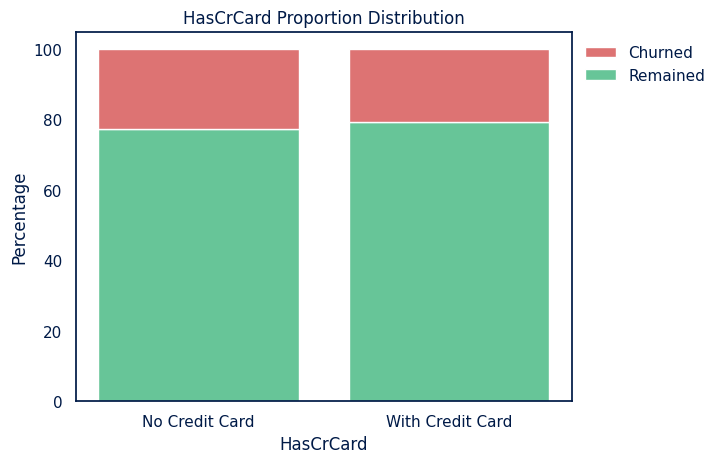

In [ ]:
counts = X_eda.groupby(['HasCrCard', 'Exited_decoded']).size().reset_index(name='Frequency')
counts['HasCrCard'] = counts['HasCrCard'].map({0: 'No Credit Card', 1: 'With Credit Card'})
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('HasCrCard')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['HasCrCard'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'HasCrCard', 'Exited_decoded', 'Proportion',
                  'HasCrCard Proportion Distribution', 'HasCrCard',palette=['#d24545', '#35b276'], style=1)

2. IsActiveMember vs. Exited

> - During the dataset investigation, it was mentioned that isActiveMember colum is a weird column since its name may suggest that it is dependent to the target variable.
- Further investigation through the visualization generated states that there is no major association between this variable and the target variable. After all, the totality of the churned customer does not approximate the total inactive members. Moreover, even in the population of active members, there are still customers who left the bank.
- Although, in observing the visualization generated, it appears the proportion of churned members in the inactive group is more than the active group. This is supported by the result of the Fisher's test for this pair of comparison. There is an association between the two (as per suggested of the p-value calculated), and the calculated Odds ratio is 0.33. This means that inactive members, in fact, are 3.3 times more likely to be churned than active members.
- So what? This finding definitely calls for our attention reduce the amount of inactive members along the way to prevent churning (note: consult some suggestions with GPT on how we should do this).

In [ ]:
# Myra: Maybe, set a customer notif if there is no activity for x no. of months?. "Hey! Discover new features/perks... We have new offers..."

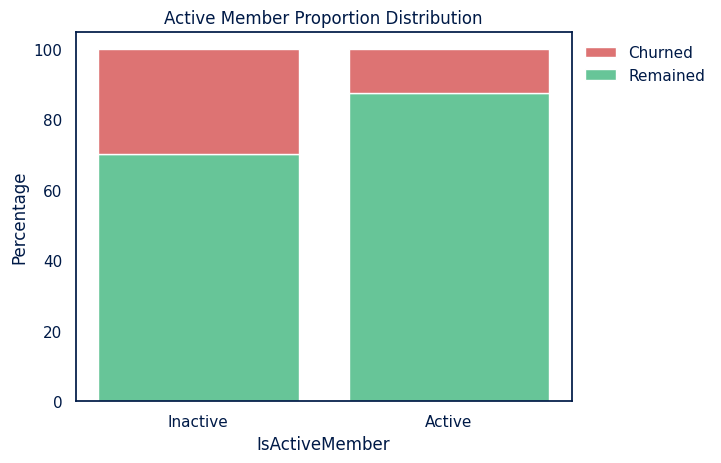

  IsActiveMember Exited_decoded  Frequency  Proportion
0       Inactive        Churned      24624   29.708632
1       Inactive       Remained      58261   70.291368
2         Active        Churned      10297   12.534541
3         Active       Remained      71852   87.465459


In [ ]:
# Active distribution with Exited hue
counts = X_eda.groupby(['IsActiveMember', 'Exited_decoded']).size().reset_index(name='Frequency')
counts['IsActiveMember'] = counts['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('IsActiveMember')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['IsActiveMember'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'IsActiveMember', 'Exited_decoded', 'Proportion',
                  'Active Member Proportion Distribution', 'IsActiveMember',palette=['#d24545', '#35b276'], style=1)

print(counts)

3. Gender vs. Exited

> - Referring to the stack bar chart alone, we can see that while it is clear that there are more male customers in the dataset, it appears that more female customers have left the bank.
- Cross-validating this observation with our Fisher's test result, we can see that there is an association between the two groups (as indicated by the calculated p-value of 0). The calculated odds ratio between the two is around 2. This simply means female customers are twice as likely to exit the bank than male customers.
- So what? This definitely suggests that focusing on female customer retention may be vital.

**Zooming in to the female demographics:**
(we cannot use this justify since hindi na siya data-driven. We should just suggest basic things that is based on our data. do not over extend. just justify based on)
- Upon further investigation, there is no difference in the age distribution of male churners compared to female churners, including their credit scores or balances. One apparent difference, however, is the proportion of inactive female customers who churned versus inactive male customers who churned. Approximately 38% of total inactive female customers have churned, while approximately 22% of total inactive male customers have churned.

In [ ]:
# Myra: maybe offer services that cater to unique female financial needs? maternity savings account? insurance with maternity benefits? maternity loan?
# Myra: You can also check age distribution of females who churned vs those who stayed. Zoom in to the female demographics. Is it around reproductive age? Just to support/disprove the suggested action above.

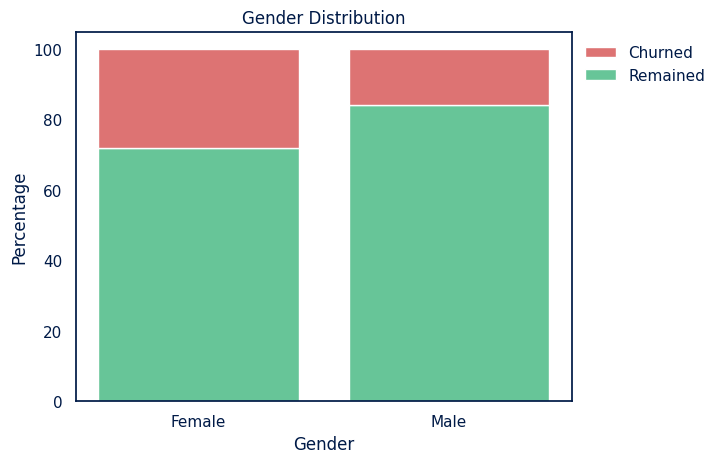

In [ ]:
# Gender distribution with Exited hue
counts = X_eda.groupby(['Gender', 'Exited_decoded']).size().reset_index(name='Frequency')

total_counts = counts.groupby('Gender')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['Gender'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'Gender', 'Exited_decoded', 'Proportion',
                  'Gender Distribution', 'Gender', palette=['#d24545', '#35b276'], style=1)



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.


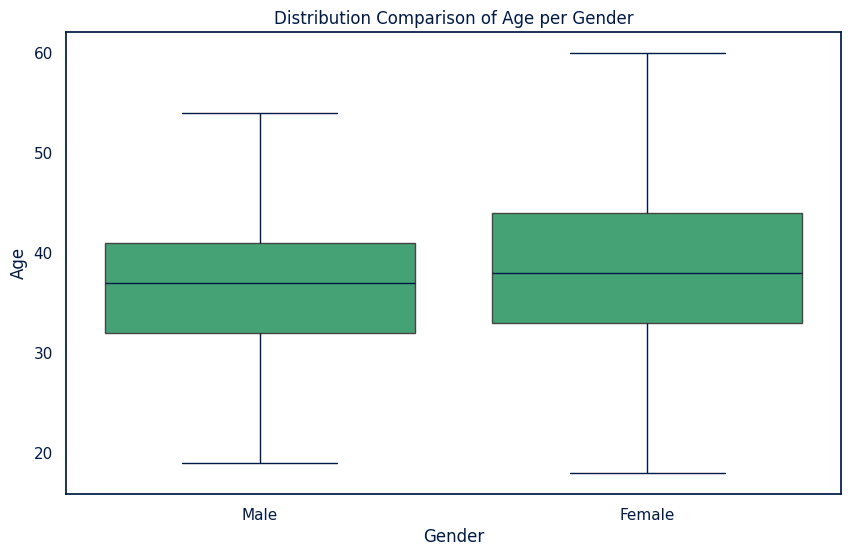

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Age', x='Gender', data=X_eda, palette=['#35b276'], whiskerprops = dict(color='#001a47'),
                 medianprops = dict(color='#001a47'), meanprops = dict(color='#001a47'),capprops = dict(color='#001a47'), showfliers=False)
plt.title("Distribution Comparison of Age per Gender", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')

In [ ]:
female_records = X_eda[X_eda['Gender'] == 'Female']
male_records = X_eda[X_eda['Gender'] == 'Male']

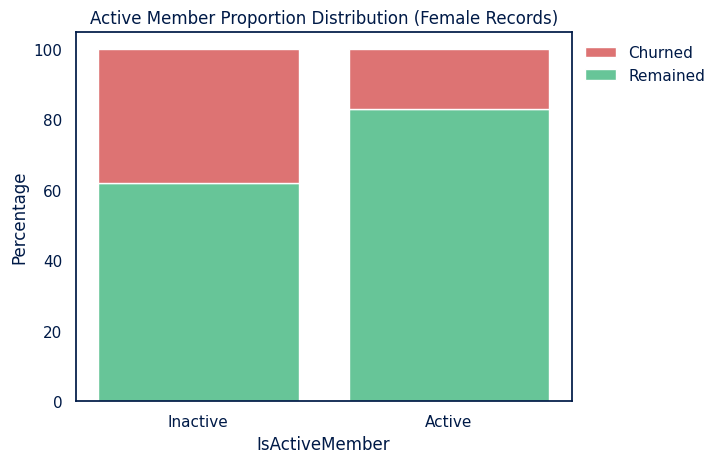

  IsActiveMember Exited_decoded  Frequency  Proportion
0       Inactive        Churned      14231   37.967558
1       Inactive       Remained      23251   62.032442
2         Active        Churned       5874   17.074589
3         Active       Remained      28528   82.925411


In [ ]:
# Active distribution with Exited hue (Female records)
counts = female_records.groupby(['IsActiveMember', 'Exited_decoded']).size().reset_index(name='Frequency')
counts['IsActiveMember'] = counts['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('IsActiveMember')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['IsActiveMember'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'IsActiveMember', 'Exited_decoded', 'Proportion',
                  'Active Member Proportion Distribution (Female Records)', 'IsActiveMember',
                  palette=['#d24545', '#35b276'], style=1)

print(counts)

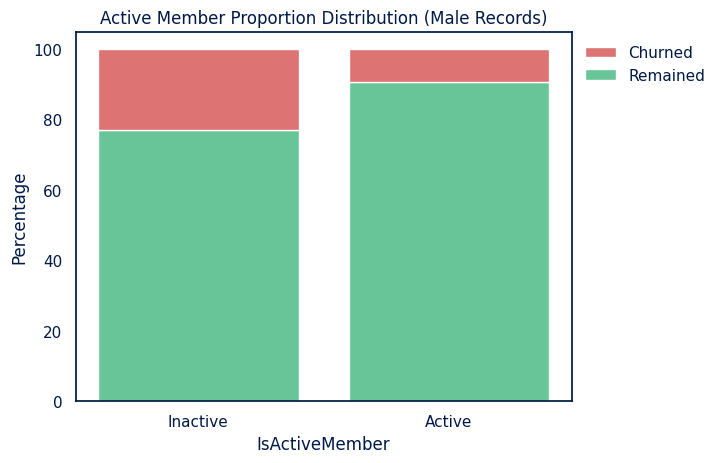

  IsActiveMember Exited_decoded  Frequency  Proportion
0       Inactive        Churned      10393   22.890558
1       Inactive       Remained      35010   77.109442
2         Active        Churned       4423    9.263409
3         Active       Remained      43324   90.736591


In [ ]:
# Active distribution with Exited hue (Male records)
counts = male_records.groupby(['IsActiveMember', 'Exited_decoded']).size().reset_index(name='Frequency')
counts['IsActiveMember'] = counts['IsActiveMember'].map({0: 'Inactive', 1: 'Active'})
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('IsActiveMember')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['IsActiveMember'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'IsActiveMember', 'Exited_decoded', 'Proportion',
                  'Active Member Proportion Distribution (Male Records)', 'IsActiveMember',
                  palette=['#d24545', '#35b276'], style=1)

print(counts)

   NumOfProducts Exited_decoded  Frequency  Proportion
0            1.0        Churned      15508   43.881045
1            1.0       Remained      19833   56.118955
2            2.0        Churned       2891    8.337659
3            2.0       Remained      31783   91.662341
4            3.0        Churned       1454   91.274325
5            3.0       Remained        139    8.725675
6            4.0        Churned        252   91.304348
7            4.0       Remained         24    8.695652


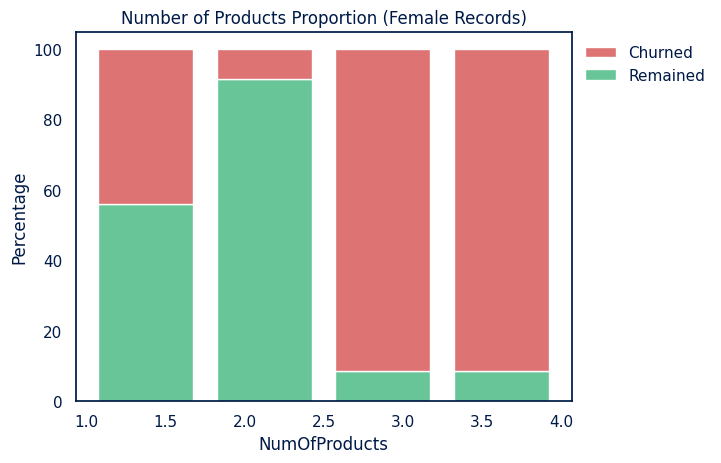

In [ ]:
counts = female_records.groupby(['NumOfProducts', 'Exited_decoded']).size().reset_index(name='Frequency')

total_counts = counts.groupby('NumOfProducts')['Frequency'].sum()
proportions = counts['Frequency'] / counts['NumOfProducts'].map(total_counts)
counts['Proportion'] = proportions*100

print(counts)

create_stackedbar(counts, 'NumOfProducts', 'Exited_decoded', 'Proportion',
                  'Number of Products Proportion (Female Records)', 'NumOfProducts', bins=4,
                  palette=['#d24545', '#35b276'], style=1)

# Not fair to use bar plot here because frequency-wise, most of the records only have 1 or 2 products.

   NumOfProducts Exited_decoded  Frequency  Proportion
0            1.0        Churned      11350   27.002593
1            1.0       Remained      30683   72.997407
2            2.0        Churned       2202    4.437995
3            2.0       Remained      47415   95.562005
4            3.0        Churned       1100   84.550346
5            3.0       Remained        201   15.449654
6            4.0        Churned        164   82.412060
7            4.0       Remained         35   17.587940


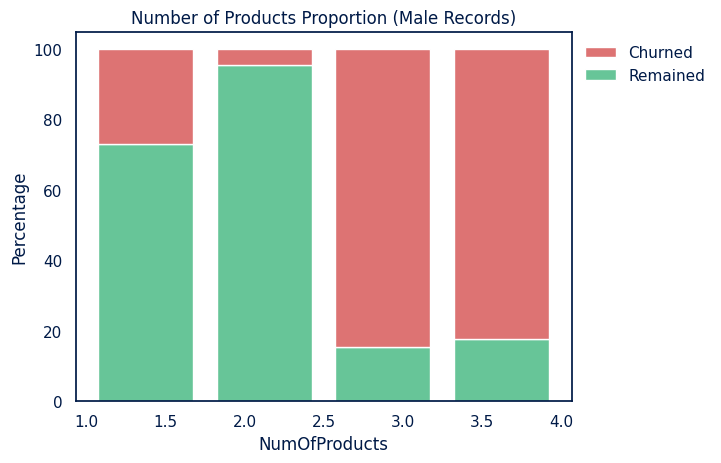

In [ ]:
counts = male_records.groupby(['NumOfProducts', 'Exited_decoded']).size().reset_index(name='Frequency')

total_counts = counts.groupby('NumOfProducts')['Frequency'].sum()
proportions = counts['Frequency'] / counts['NumOfProducts'].map(total_counts)
counts['Proportion'] = proportions*100

print(counts)

create_stackedbar(counts, 'NumOfProducts', 'Exited_decoded', 'Proportion',
                  'Number of Products Proportion (Male Records)', 'NumOfProducts', bins=4,
                  palette=['#d24545', '#35b276'], style=1)

# Not fair to use bar plot here because frequency-wise, most of the records only have 1 or 2 products.

4. France, Germany, and Spain vs. Exited

> - Scrutnizing the visualization generated, we can immediately see that proportion wise, it appears that German customers are more likely to get churned as compared to French and Spanish customers.
- Our fisher's test result that there is an association between Geography vs. Exited. Let's take a look at their corresponding Odds ratio.
- For french and spanish group, the odds ratio are 0.5 and 0.7 respectively. This simply means that French and Spanish groups are less-likely to get churned than non-french and non-spanish groups.
- On the other hand, Germany vs. Exited generated an Odds ratio of 3. This means that German customers are 3x more likely to churn their accounts than non-german customers.
- We can definitely see that through our supporting viz.

**Zooming in to the German demographics**
- Further exploration of the difference between German vs. Non-German customers when it comes to credit score, age, estimated salary shows us that there really is not much difference between each group.
- This may suggest that while strategies tailored to german customers may be helpful, we need to find the root causes of them leaving. Due to the limitation of our working dataset, it may be helpful to perform internal studies on the german demographics, specifically on their pain points. Other factors, such as competitors, may also be a contributing component for churning.


In [ ]:
# Myra: Curious question, is there difference in credit scores between races? just to check if the  bank discriminates scores from race.
# Myra: If a bank's scoring system discriminates from race, then that may lead to trust issues and discriminated customers eventually leaving.

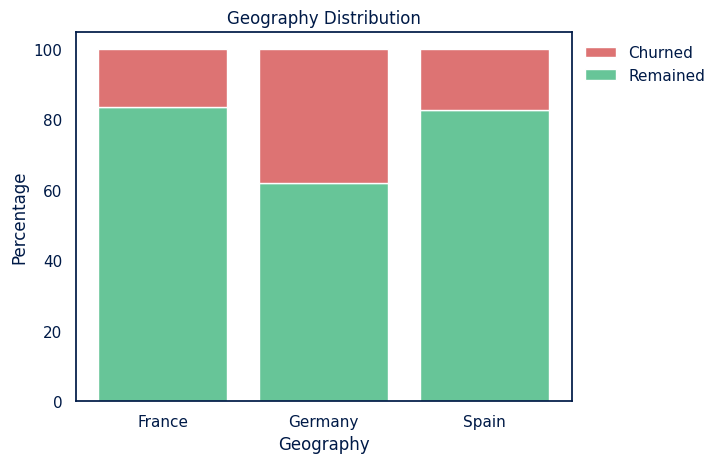

  Geography Exited_decoded  Frequency  Proportion
0    France        Churned      15572   16.528154
1    France       Remained      78643   83.471846
2   Germany        Churned      13114   37.895163
3   Germany       Remained      21492   62.104837
4     Spain        Churned       6235   17.217574
5     Spain       Remained      29978   82.782426


In [ ]:
# Geography distribution with Exited hue
counts = X_eda.groupby(['Geography', 'Exited_decoded']).size().reset_index(name='Frequency')
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('Geography')['Frequency'].sum()

# Calculate proportions for each group
proportions = counts['Frequency'] / counts['Geography'].map(total_counts)

# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

create_stackedbar(counts, 'Geography', 'Exited_decoded', 'Proportion',
                  'Geography Distribution', 'Geography', palette=['#d24545', '#35b276'], style=1)
print(counts)
# Apply stack



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

FixedFormatter should only be used together with FixedLocator


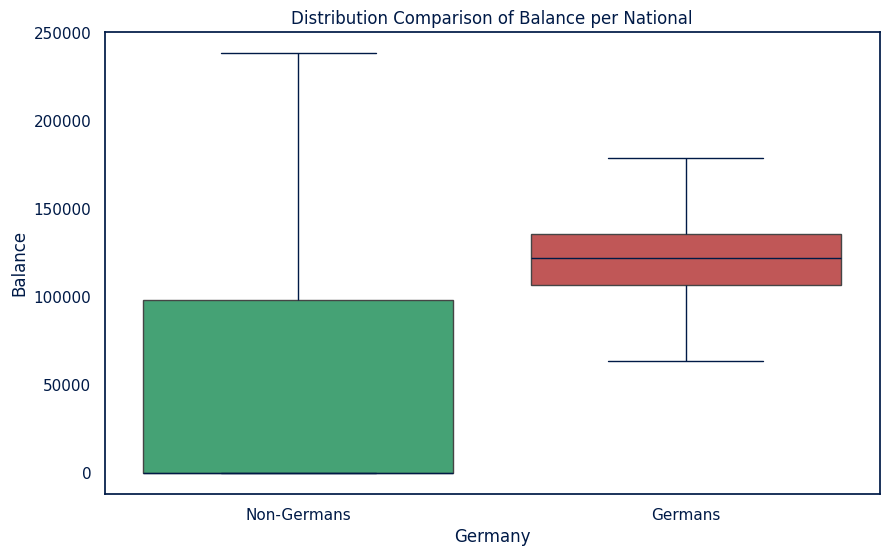

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Balance', x='Germany', data=X_eda, palette=['#35b276', '#d24545'], whiskerprops = dict(color='#001a47'),
                 medianprops = dict(color='#001a47'), meanprops = dict(color='#001a47'),capprops = dict(color='#001a47'), showfliers=False)
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[1] = 'Germans'
labels[0] = 'Non-Germans'
ax.set_xticklabels(labels)
plt.title("Distribution Comparison of Balance per National", color='#001a47')
ax.spines[['top', 'bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')

#### **Numerical vs. Categorical values comparison**

In comparing numerical to categorical values, we cannot use Pearson's R, Chi-square, or Fisher's Test. Here, we have the option to perform a t-test, but we need to take into consideration the state of our dataset:

* Our dataset is imbalanced (with respect to the target variable) and some of our data is skewed. This violates the normality assumption for the t-test.
* Since we want our method to be independent of the normality assumption, we choose a non-parametric test instead. Our closest non-parametric alternative is the Mann-Whitney U test.

> Note:
<br> It is important to note that, due to the size of our dataset, the Mann-Whitney U test may also produce p-values that are significant even if the groups are not truly different. Therefore, we need to cross-verify our findings through the support of visualizations and another non-parametric method called Cliff's Delta. Like Fisher's Test's odds ratio, Cliff's Delta calculates the magnitude/area of effect of the association between two groups. These additional approaches will provide us with a more robust and informative way to analyze the impact of the comparisons.


- Moreover, for this specific test, we will limit our comparisons only for Numerical values vs. the `Exited` (our target) variable.

In [ ]:
def mann_whitney(df, cc_col, num_col):
  for col1 in num_col:
    for col2 in cc_col:
      data_subset = X_eda[[col1, col2]]
      data_subset_0 = X_eda[X_eda[col2] == 0][col1]
      data_subset_1 = X_eda[X_eda[col2] == 1][col1]
      statistic, p_value = mannwhitneyu(data_subset_0, data_subset_1)

      print(f"Mann-Whitney between {col1} and {col2}:")
      print("Mann-Whitney U statistic:", statistic)
      print("p-value:", p_value)

      delta, res = cliffs_delta(list(data_subset_1), list(data_subset_0))

      print("Cliff's Delta:", abs(delta))
      print("Res: ", res)
      print("-----------")

mann_whitney(X_eda, categorical_col, num_col)


Mann-Whitney between CreditScore and HasCrCard:
Mann-Whitney U statistic: 2535482669.5
p-value: 0.268640909415118
Cliff's Delta: 0.003650051599325923
Res:  negligible
-----------
Mann-Whitney between CreditScore and IsActiveMember:
Mann-Whitney U statistic: 3348891463.5
p-value: 9.33037640949872e-09
Cliff's Delta: 0.016322256716704654
Res:  negligible
-----------
Mann-Whitney between CreditScore and Exited:
Mann-Whitney U statistic: 2365349854.5
p-value: 2.742326257814912e-32
Cliff's Delta: 0.04116130485431284
Res:  negligible
-----------
Mann-Whitney between CreditScore and gender_encoded:
Mann-Whitney U statistic: 3359023964.5
p-value: 0.2505273872673741
Cliff's Delta: 0.00329351057123015
Res:  negligible
-----------
Mann-Whitney between CreditScore and France:
Mann-Whitney U statistic: 3352145655.0
p-value: 0.09404492005926977
Cliff's Delta: 0.0048078844903803744
Res:  negligible
-----------
Mann-Whitney between CreditScore and Germany:
Mann-Whitney U statistic: 2250857979.0
p-value

**Interpretation:**

> Relevant, significant, and non-negligible comparisons:
- Age vs. Exited (p-value of 0)
- Balance vs. Exited (p-value of 0)
- NumOfProducts vs. Exited (p-value of 0)




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



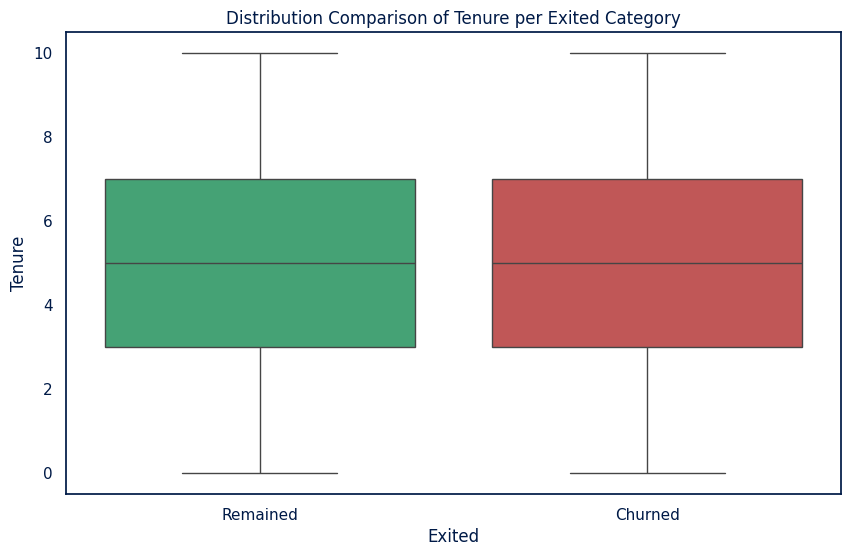

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Tenure', x='Exited_decoded', data=X_eda, palette=['#35b276', '#d24545'])
plt.title("Distribution Comparison of Tenure per Exited Category", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
plt.xlabel("Exited")
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



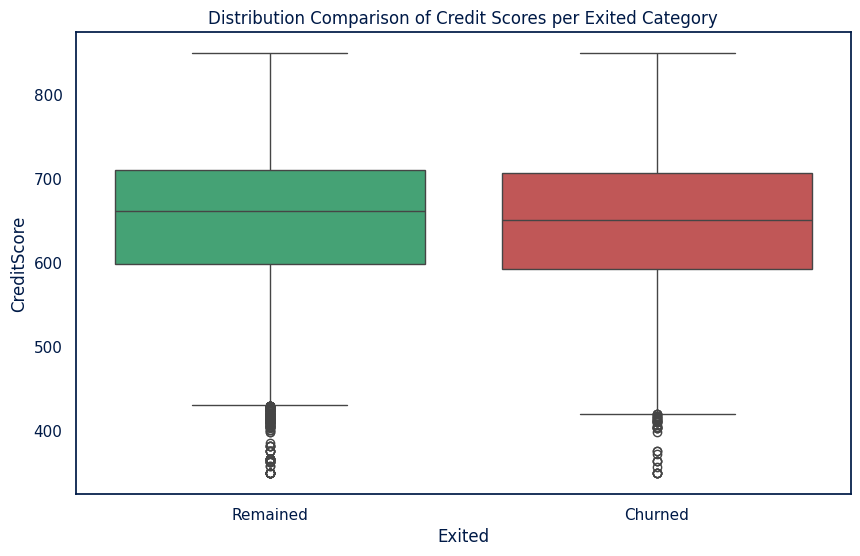

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='CreditScore', x='Exited_decoded', data=X_eda, palette=['#35b276', '#d24545'])
plt.title("Distribution Comparison of Credit Scores per Exited Category", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
plt.xlabel("Exited")
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')

<Axes: xlabel='Exited', ylabel='CreditScore'>

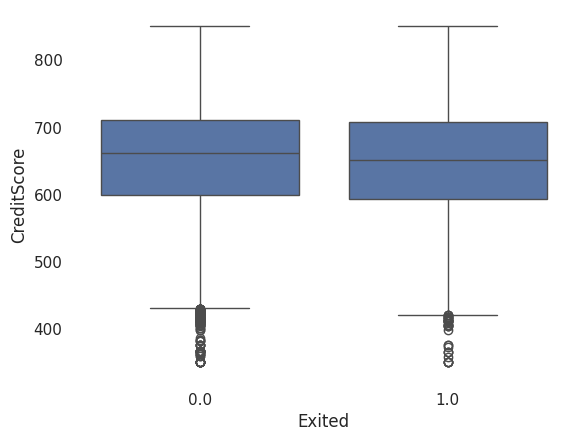

In [ ]:
sns.boxplot(y='CreditScore', x='Exited', data=X_eda)

1. Age vs Exited
- From our generated plots below (see box plot and histogram), it is apparent that customers from ages 40-50 are more likely to get churned.
- In support of our viz, the results from mann-whitney test with Cliff's delta suggests that there is indeed a moderate difference between the average age of both `Exited` categories (Remained vs. Exited).
- This tells us as early as now that retention strategies for churn-probable age group must be performed.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



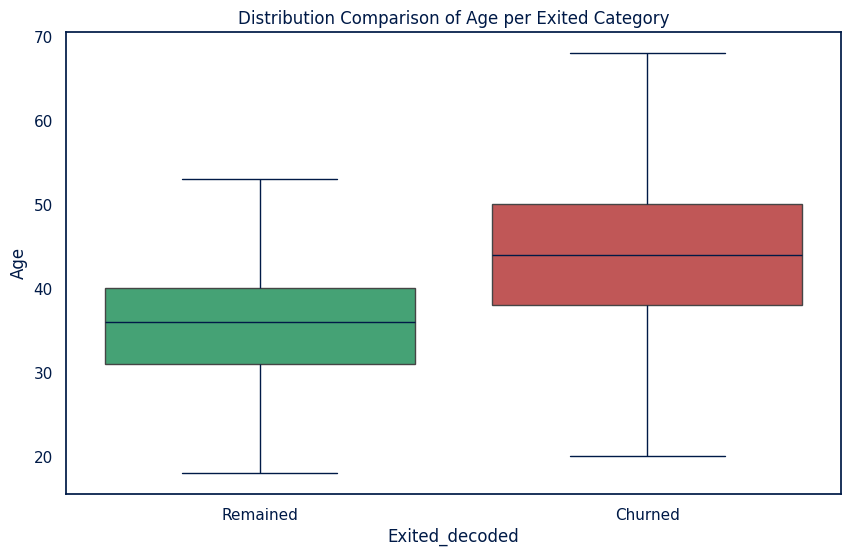

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Age', x='Exited_decoded', data=X_eda, palette=['#35b276', '#d24545'], whiskerprops = dict(color='#001a47'),
                 medianprops = dict(color='#001a47'), meanprops = dict(color='#001a47'),capprops = dict(color='#001a47'), showfliers=False)
plt.title("Distribution Comparison of Age per Exited Category", color='#001a47')
ax.spines[['top', 'bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')

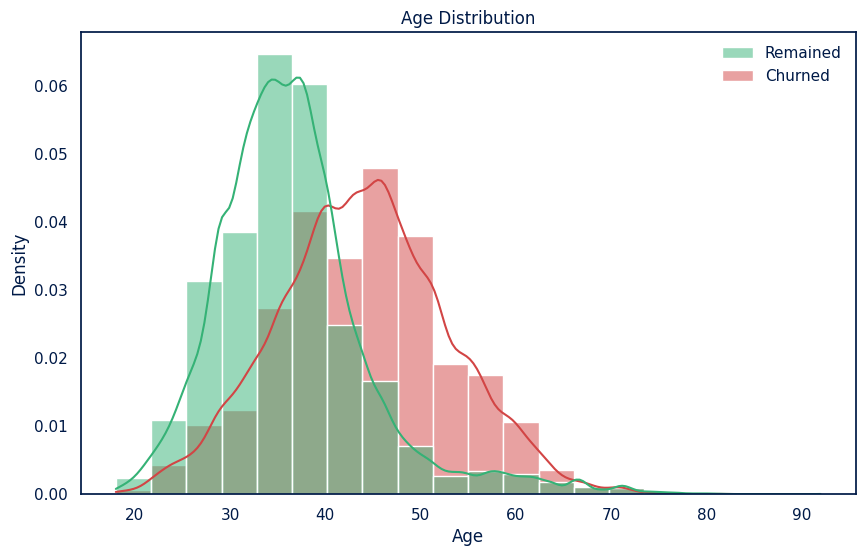

In [ ]:
# Age distribution with Exited hue
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=X_eda,x='Age',hue='Exited_decoded', stat="density", common_norm=False, kde=True, bins=20, palette=['#35b276', '#d24545'])
plt.ylabel('Density')
plt.title('Age Distribution', color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')
ax.grid(False)
sns.move_legend(ax, "upper right", frameon=False, labelcolor='#001a47', title=None)

2. Balance vs. Exited

> - Checking our Box plot, it appears that the difference between the central tendencies between the balances of both Exited category is not that much. The boxes appears to be very similar, although the 25th percentile + median of the Remained group is at 0. From our previous exploration, we saw that more than 50% of the data has 0 as a balance, making our dataset skewed (see distribution). But if we scrutinize our histogram distribution, it appears that for accounts with balances > 0, they are more likely to churn.
- Cross checking these visualization findings with the mann-whitney + cliff delta's result, it suggests that there is there is a difference between the balance group of both Exited categories. However, this difference is just small.

Additional idea:
- Since we can see that more than 50% of the balances are 0, perhaps it will do us some good to perform a simple binary encoding for the balance group.



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



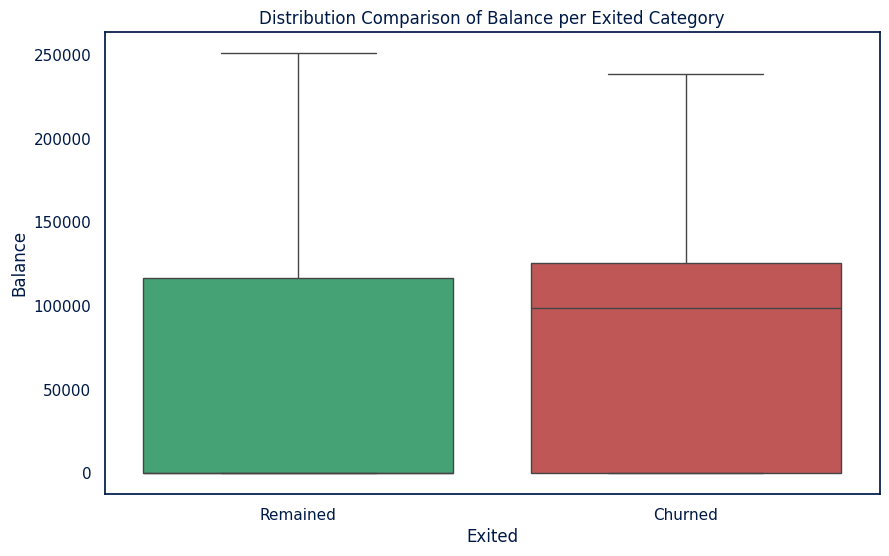

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.boxplot(y='Balance', x='Exited_decoded', data=X_eda, palette=['#35b276', '#d24545'])
plt.title("Distribution Comparison of Balance per Exited Category", color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
plt.xlabel("Exited")
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')

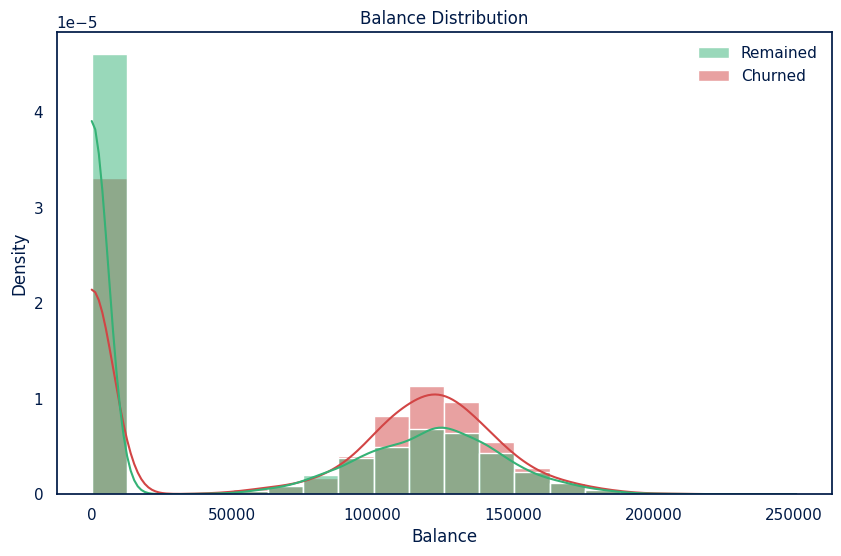

In [ ]:
# Balance distribution with Exited hue
# Age distribution with Exited hue
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=X_eda,x='Balance',hue='Exited_decoded', stat="density", common_norm=False, kde=True, bins=20, palette=['#35b276', '#d24545'])
plt.ylabel('Density')
plt.title('Balance Distribution', color='#001a47')
ax.spines[['top','bottom', 'left', 'right']].set_color('#001a47')
ax.xaxis.label.set_color('#001a47')
ax.yaxis.label.set_color('#001a47')
ax.tick_params(axis='x', colors='#001a47')
ax.tick_params(axis='y', colors='#001a47')
sns.move_legend(ax, "upper right", frameon=False, labelcolor='#001a47', title=None)
# consistenccy in viz

**Additional idea:**
- Since we can see that more than 50% of the balances are 0, perhaps it will do us some good to perform a simple binary encoding for the balance column. This may help us clearly see the relationship between the two, plus this may help during the machine learning modeling part of this project.

3. NumOfProducts vs. Exited

>
- This visualization above shows us that customers with less than 2 number of products are less likely to churn. Here, we can also observe that customers with 2 products are the least likely to churn. Proportionally, ~94 of the total customers with 2 products decided to remain.
- Meanwhile, customers with greater than 3 or 4 products are most likely to churn than to remain. Proportionally, approximately 85% of all customers with 3 or more products have churned. As early as now, we can tell that perhaps it is better to have a customer retention strategy for customers with 3 and more products.  
- Cross verifying the insights we discussed from the viz alone with the results of Mann-Whitney w/ Cliff's Delta, it suggests that there is a moderate difference between NumOfProducts for each Exited categories. This strengthens the insights that we derived from our visualization.

   NumOfProducts Exited_decoded  Frequency  Proportion
0            1.0        Churned      26858   34.711919
1            1.0       Remained      50516   65.288081
2            2.0        Churned       5093    6.042163
3            2.0       Remained      79198   93.957837
4            3.0        Churned       2554   88.251555
5            3.0       Remained        340   11.748445
6            4.0        Churned        416   87.578947
7            4.0       Remained         59   12.421053


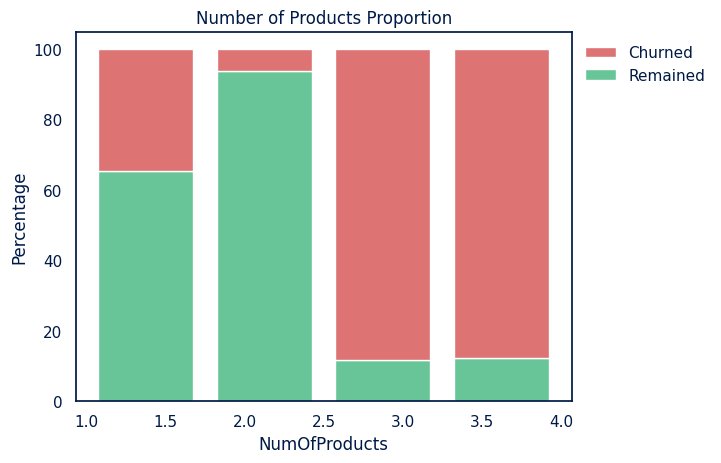

In [ ]:
# Number of Products distribution with Exited hue
counts = X_eda.groupby(['NumOfProducts', 'Exited_decoded']).size().reset_index(name='Frequency')

total_counts = counts.groupby('NumOfProducts')['Frequency'].sum()
proportions = counts['Frequency'] / counts['NumOfProducts'].map(total_counts)
counts['Proportion'] = proportions*100

print(counts)

create_stackedbar(counts, 'NumOfProducts', 'Exited_decoded', 'Proportion',
                  'Number of Products Proportion', 'NumOfProducts', bins=4,
                  palette=['#d24545', '#35b276'], style=1)

---
## ***5 - Feature Engineering***

**Steps:**
- Basic Preprocessing (without the scaling/normalization aspect)
  - Encode remaining categoricals (already done during the EDA).
  - Remove unnecessary columns.
- Evaluate features as aided by Mutual Information.
- Attempt to add additional, useful features.

**Note:**
> - This is also an iterative process. Thus, we may have to continue engineering our features once we have evaluated their performance on our models
> - Feature engineering involves all process that takes place to prepare our data for modeling. So, there are some feature engineering work that we have already applied before we reached this point (like data cleaning).
---

In [ ]:
# Let's update our training dataframe to the dataframe we were working on during the EDA.
X_train = X_eda.copy()
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited_decoded,gender_encoded,geography_mapped,France,Germany,Spain,Exited
0,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,Remained,0,0,1,0,0,0.0
1,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,Remained,0,0,1,0,0,0.0
2,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,Remained,0,0,1,0,0,0.0
3,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,Remained,0,0,1,0,0,0.0
4,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,Remained,0,1,0,0,1,0.0


### **Basic Preprocessing**
- Encoding, removing extra columns, scaling

In [ ]:
print(X_train.Gender.unique())
print(X_train.Geography.unique())

['Male' 'Female']
['France' 'Spain' 'Germany']


#### ***Remove unnecessary columns***

Now that we are done with the encoding portion, we should remove redundant columns.

In [ ]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited_decoded,gender_encoded,geography_mapped,France,Germany,Spain,Exited
0,668.0,France,Male,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,Remained,0,0,1,0,0,0.0
1,627.0,France,Male,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,Remained,0,0,1,0,0,0.0
2,678.0,France,Male,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,Remained,0,0,1,0,0,0.0
3,581.0,France,Male,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,Remained,0,0,1,0,0,0.0
4,716.0,Spain,Male,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,Remained,0,1,0,0,1,0.0


In [ ]:
# We need to drop Gender, Geography, Exited_decoded, geography_mapped columns
X_train = X_train.drop(['Gender', 'Exited_decoded', 'Geography', 'geography_mapped'], axis=1)

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_encoded,France,Germany,Spain,Exited
0,668.0,33.0,3.0,0.00,2.0,1.0,0.0,181449.97,0,1,0,0,0.0
1,627.0,33.0,1.0,0.00,2.0,1.0,1.0,49503.50,0,1,0,0,0.0
2,678.0,40.0,10.0,0.00,2.0,1.0,0.0,184866.69,0,1,0,0,0.0
3,581.0,34.0,2.0,148882.54,1.0,1.0,1.0,84560.88,0,1,0,0,0.0
4,716.0,33.0,5.0,0.00,2.0,1.0,1.0,15068.83,0,0,0,1,0.0


### **Mutual Information**
- Evaluate which discrete features are important/potentially useful. In a nutshell, mutual information measures the dependence of features to the target variable.

***Importance of Mutual Information for evaluating important features:***
- While we have already performed a correlation matrix during the EDA portion of this project, it is important to take note that correlation only captures linear relationship. After all, linear relationship is not all that there is. Mutual information, on the otherhand, can capture even non-linear relationship (e.g. exponential, quadratic, etc.).




In [ ]:
# As a prerequisite of the MI method of sklearn library, we need to identify which features are discrete
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165034 entries, 0 to 165033
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  float64
 1   Age              165034 non-null  float64
 2   Tenure           165034 non-null  float64
 3   Balance          165034 non-null  float64
 4   NumOfProducts    165034 non-null  float64
 5   HasCrCard        165034 non-null  float64
 6   IsActiveMember   165034 non-null  float64
 7   EstimatedSalary  165034 non-null  float64
 8   gender_encoded   165034 non-null  int64  
 9   France           165034 non-null  uint8  
 10  Germany          165034 non-null  uint8  
 11  Spain            165034 non-null  uint8  
 12  Exited           165034 non-null  float64
dtypes: float64(9), int64(1), uint8(3)
memory usage: 14.3 MB


In [ ]:
# CreditScore, NumOfProducts, HasCrCard, IsActiveMember, gender_encode, France, Germany, and Spain are discrete scores.
  # Age and Tenure are both related to time so it will make more sense to treat them as continuous.
discrete_features = ['CreditScore', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'gender_encoded', 'France', 'Germany', 'Spain']
X_train[discrete_features] = X_train[discrete_features].astype(int)
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,gender_encoded,France,Germany,Spain,Exited
0,668,33.0,3.0,0.00,2,1,0,181449.97,0,1,0,0,0.0
1,627,33.0,1.0,0.00,2,1,1,49503.50,0,1,0,0,0.0
2,678,40.0,10.0,0.00,2,1,0,184866.69,0,1,0,0,0.0
3,581,34.0,2.0,148882.54,1,1,1,84560.88,0,1,0,0,0.0
4,716,33.0,5.0,0.00,2,1,1,15068.83,0,0,0,1,0.0


In [ ]:
# Function obtained from Kaggle
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Let's finally change our working dataframe in preperation for the succeeding phases.
X = X_train.copy()
y = X.pop('Exited')

In [ ]:
discrete_features = X.dtypes == int

In [ ]:
mi_scores = make_mi_scores(X, y, discrete_features)

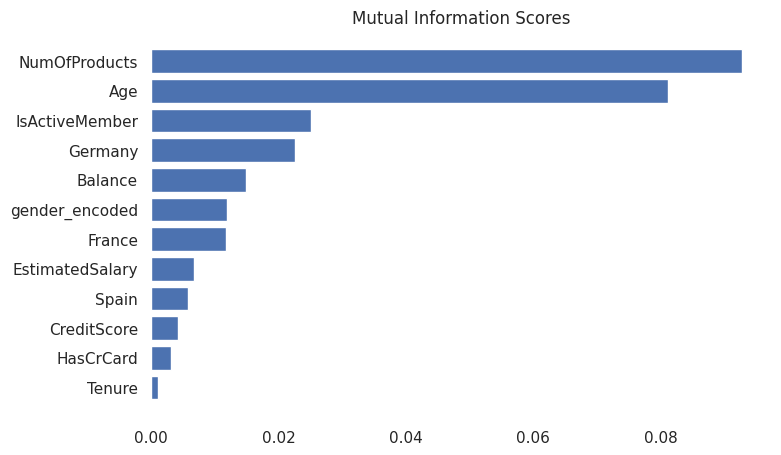

In [ ]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [ ]:
mi_scores

NumOfProducts      0.092793
Age                0.081219
IsActiveMember     0.025103
Germany            0.022574
Balance            0.014813
gender_encoded     0.011900
France             0.011711
EstimatedSalary    0.006752
Spain              0.005781
CreditScore        0.004238
HasCrCard          0.003075
Tenure             0.001035
Name: MI Scores, dtype: float64

**Interpretation:**

> - With the generated barplot of the Mutual Information scores, it appears that `NumOfProducts` and `Age` produced the highest scores. Meanwhile, `Tenure` generated the lowest score, making this metric conclude that Tenureship has no bearing in evaluating customers churn.

- Now, let's try to further explore the highest scorerers through cross-validating them with a linear relationship plot with the target variable.

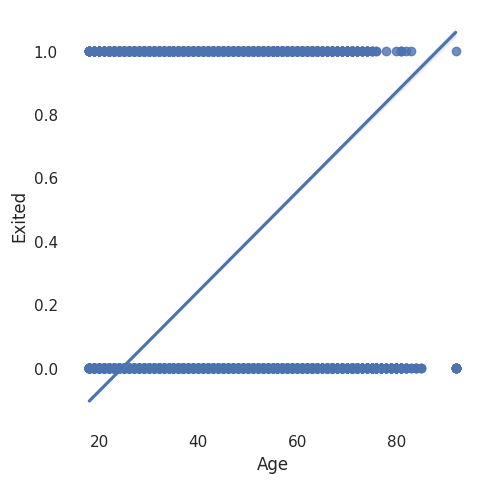

In [ ]:
sns.lmplot(x="Age", y="Exited", data=X_train);

**Interpretation:**

> - We know from the correlation matrix and Age distribution with respect to the target variable that there is a linear relationship between the two. We figured out that as the age of the customer increase, they are more likely to get churn. We also found out that most churners are from the middle age group (30-50).
> - The linear model plot that we generated above basically confirms our initial findings. Age is a vital component in predicting churn.

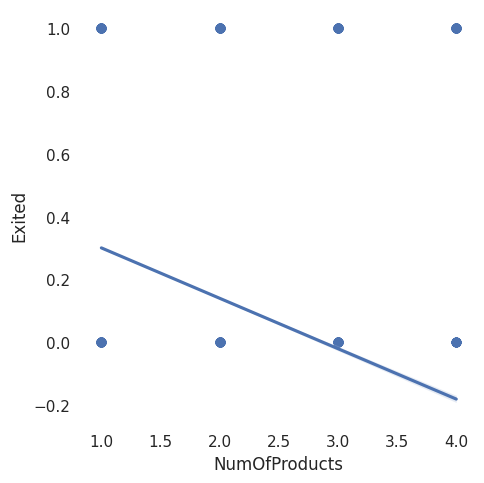

In [ ]:
sns.lmplot(x="NumOfProducts", y="Exited", data=X_train);

**Interpretation:**

> - From our previous findings with the relationship of `NumOfProducts` vs the target variable `Exited`, we figure out that proportion-wise, customers with 3 or more number of products are more likely to get churn.
- However, from the linear model plot generated above, it shows that as the number of products increases, it is more likely that a customer will stay. There is definitely a problem with using the linear model plot:
  1. We assumed that the relationship between `Exited` and `NumOfProducts` is linear. lmplot is used for showing linear relationships.
  2. Using lmplot is also biased to the majority group. Looking back, the `NumOfProducts` group with the most count is 1 and 2, and most of the customers who decided to remain belongs to this group.
- What we are sure right now is that `NumOfProducts` is the most important feature as per the Mutual Information, but we are not certain as of this moment what association do they have with each other.
- Certainly, it's not linear. We can prove this by looking back at the bar graph of `NumOfProducts` vs `Exited` when we look at things proportionally.  

### **Additional Engineering**
- Based on our additional idea earlier during the EDA, it may do us good to perform a 2nd variant of the dataset to perform binary encoding for the balance feature.

In [ ]:
X_train_2 = X_train.copy()
X_train_2["Balance"] = X_train_2["Balance"].apply(lambda x: 0 if x==0 else 1)

* With this additional feature, it will be helpful for us to perform another Fisher's test between this new feature vs. the target feature, and Mutual Information

In [ ]:
table = pd.crosstab(X_train_2["Balance"], X_train_2["Exited"])
odds_ratio, p_value = fisher_exact(table)
print(f"Pair: {col} vs. Exited")
print(f"Odds Ratio: {odds_ratio:.4f}")
print(f"p-value: {p_value:.4f}")
print("-----------")

Pair: 0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
165029    0.0
165030    0.0
165031    0.0
165032    0.0
165033    1.0
Name: Exited, Length: 165034, dtype: float64 vs. Exited
Odds Ratio: 1.9278
p-value: 0.0000
-----------


In [ ]:
X_train_2['Exited_decoded'] = X_train_2['Exited'].map({0: 'Remained', 1: 'Churned'})
counts = X_train_2.groupby(['Balance', 'Exited_decoded']).size().reset_index(name='Frequency')
counts['Balance'] = counts['Balance'].map({0: '0 balance', 1: '> 0 balance'})
# Calculate total counts for each group of 'NumOfProducts'
total_counts = counts.groupby('Balance')['Frequency'].sum()
# Calculate proportions for each group
proportions = counts['Frequency'] / counts['Balance'].map(total_counts)
# Add the proportions to the counts DataFrame
counts['Proportion'] = proportions*100

# create_stackedbar(counts, 'Balance', 'Exited_decoded', 'Proportion',
#                   'New Balance Proportion Distribution', 'Balance')
X_train_2 = X_train_2.drop('Exited_decoded', axis=1)

**Interpretation**
- Individuals with a balance (coded as 1) are 1.9 times more likely to have churned (exited, coded as 1) compared to those with no balance (coded as 0).
Having a balance is associated with an increased risk of churning.

In [ ]:
X2 = X_train_2.copy()
y2 = X2.pop('Exited')
discrete_features = X2.dtypes == int
mi_scores2 = make_mi_scores(X2, y2, discrete_features)

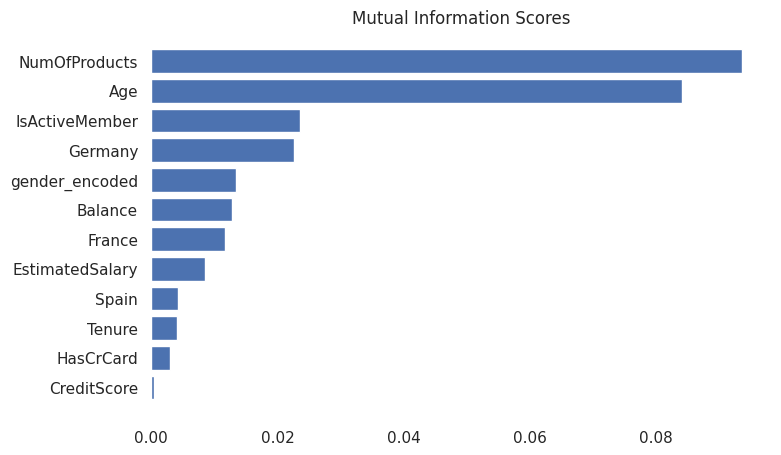

In [ ]:
plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores2)

In [ ]:
mi_scores2

NumOfProducts      0.093582
Age                0.084156
IsActiveMember     0.023551
Germany            0.022631
gender_encoded     0.013418
Balance            0.012774
France             0.011667
EstimatedSalary    0.008539
Spain              0.004302
Tenure             0.004033
HasCrCard          0.003023
CreditScore        0.000370
Name: MI Scores, dtype: float64

Mutual information score wise, it appears that the new balance vs the old balance still has the same impact.

---
## ***6 - Data Preprocessing***

**Steps:**
- Splitting and Undersampling
- Scale both training and testing sets in preparation for the machine learning modeling
---

### ***Splitting and Undersampling***
- We perform splitting first before undersampling because it is advisable. This can mitigate the risk of data leakage.
- During our findings in the EDA, we figured out that our targer variable `Exited` is not balanced. This can definitely affect our machine learing model in a way that it will be more likely to predict only the correctness of the majority class. We need to balance them. Hence, we perform undersampling.

In [ ]:
# Split the dataset into training and testing sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
# Apply undersampling to the training set
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=46)
train_X_resampled, train_y_resampled = undersampler.fit_resample(train_X, train_y)

### ***Scaling/Normalizing***

- Scaling is an important step that we must perform since some machine learning model are sensitive to scaling.
- However, in order to know which scaling method we should use, we must first understand the nature of our numerical features in terms of distribution.

For this process, we need to investigate the following numerical columns: `Balance`, `CreditScore`, and `EstimatedSalary`

<Axes: xlabel='Balance', ylabel='Count'>

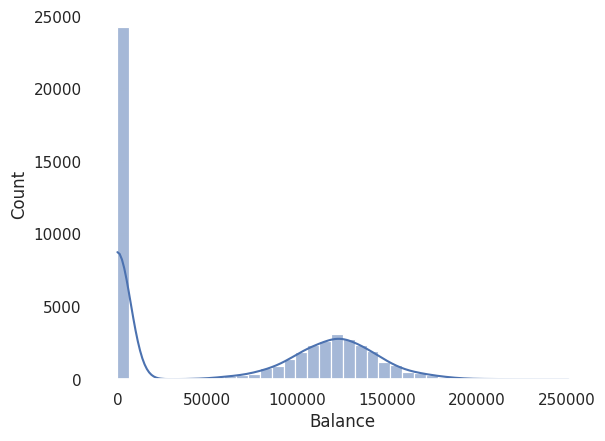

In [ ]:
sns.histplot(data=train_X_resampled.Balance, kde=True)
# Try to make it binary.

<Axes: xlabel='CreditScore', ylabel='Count'>

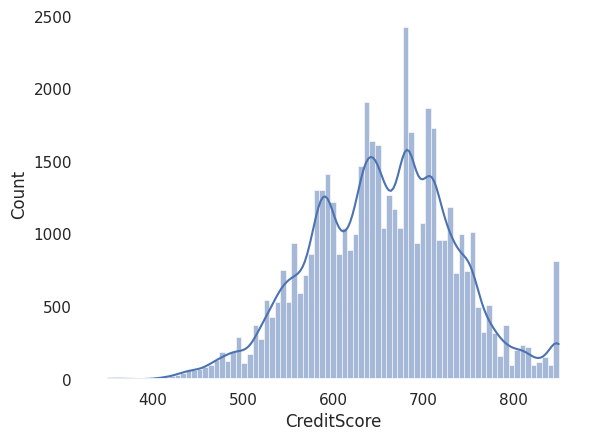

In [ ]:
sns.histplot(data=train_X_resampled.CreditScore, kde=True)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

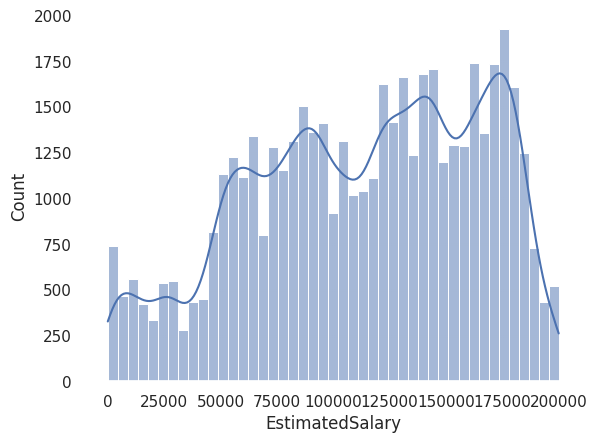

In [ ]:
sns.histplot(data=train_X_resampled.EstimatedSalary, kde=True)

At first glance, we can immediately tell that `Balance` is skewed while `CreditScore` is already normalize. `EstimatedSalary` also appears that it is not normally distributed.

Since some of our features are not normally distributed, it will be helpful for us to choose `Min-Max Scaling` method.

***Note:***
> Although, it is important to mention that scaling methods usually depends on the machine learning model that we are opting to use. For example, if we choose the Random Forest model, scaling is not even needed (although it does not also mind if the data it fits is scaled). We might try to perform additional scaling methodologies later on should we try to use a certain machine learning model with a certain scaling/normalization requirement.

For the mean time, let's scale our data using the min-max scaling method. We will only apply it to the relevant numerical features.

In [ ]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# # Fit and transform the entire DataFrame
train_X_resampled[['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.fit_transform(train_X_resampled[['CreditScore', 'Balance', 'EstimatedSalary']])

# train_X_resampled[['CreditScore', 'EstimatedSalary']] = scaler.fit_transform(train_X_resampled[['CreditScore', 'EstimatedSalary']])

In [ ]:
# # Scale the testing set as well
test_X[['CreditScore', 'Balance', 'EstimatedSalary']] = scaler.transform(test_X[['CreditScore', 'Balance', 'EstimatedSalary']])

# test_X[['CreditScore', 'EstimatedSalary']] = scaler.transform(test_X[['CreditScore', 'EstimatedSalary']])

---
## ***7 - Applying Machine Learning***
While we've been analyzing how individual features influence our target variable "Exited," we haven't yet explored how these features interact with each other. This is a crucial step, as features often don't operate in isolation. In fact, their combined effects can be significantly different from the sum of their individual impacts.

Advanced machine learning models can address this challenge by automatically learning these complex interactions. This allows us to uncover hidden patterns and understand how features work together to predict outcomes.

However, simply obtaining accurate predictions isn't enough. To truly address the problem, we need to understand why the model makes the predictions it does. This is where explainability becomes crucial.

By gaining insights into the model's decision-making process and how different features interact, we can achieve several benefits:

> - Improved trust and transparency: Explainability helps us understand the rationale behind the model's predictions, fostering trust and confidence in its capabilities.
- Reduced bias and errors: By identifying potential biases or limitations within the model, we can mitigate their impact and ensure fairer and more reliable predictions.
- More effective solutions: By understanding the underlying patterns between features and the target variable, we can develop targeted solutions that address the root causes of the problem.

Overall, analyzing feature interactions and prioritizing explainability in our machine learning models are essential steps towards gaining deeper insights, building robust models, and ultimately, developing effective solutions.

**Steps:**
- Choose base model
- Fit, Train, Evaluate
- Explore
---

In [ ]:
# Myra: Base on the matrix, there are around actual 10k churned accts and the models can catch 7-8k, that is we can save 7-8k customers from churning. that's the business value we want to highlight.

In [ ]:
# Myra:
# Current: 10397/49511 churned = 0.21 churn rate
# To-be: If model is deployed and can save 7k customers, 3397/49511 churned = 0.07 churn rate. Projection is we reduce churn rate by 14%

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Logistic Regression Results:


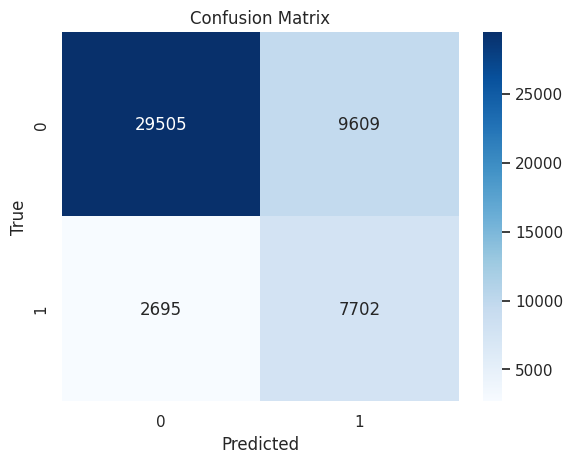

Accuracy: 0.7515
ROC-AUC: 0.7476
F1-Score: 0.5559
Precision: 0.4449
Recall: 0.7408
-----------------
Random Forest Results:


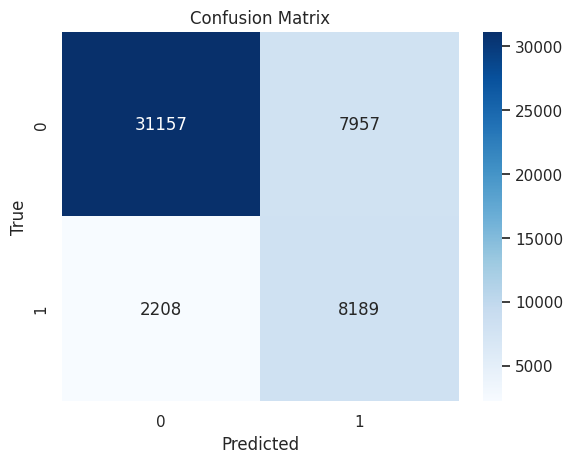

Accuracy: 0.7947
ROC-AUC: 0.7921
F1-Score: 0.6170
Precision: 0.5072
Recall: 0.7876
-----------------
XGBoost Results:


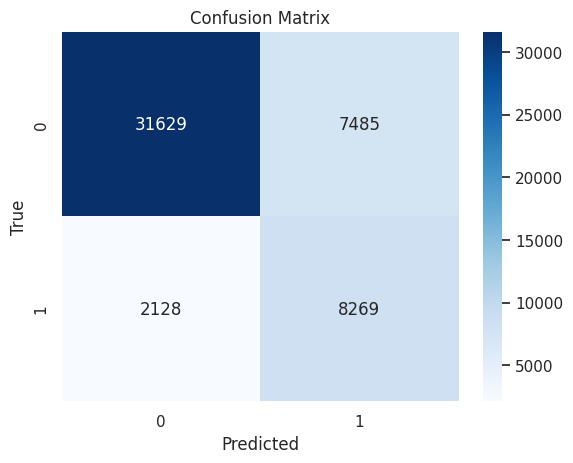

Accuracy: 0.8058
ROC-AUC: 0.8020
F1-Score: 0.6324
Precision: 0.5249
Recall: 0.7953
-----------------
[LightGBM] [Info] Number of positive: 24524, number of negative: 24524
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 49048, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Results:


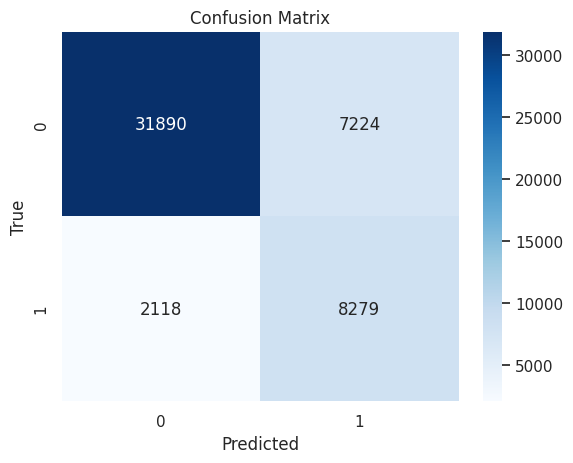

Accuracy: 0.8113
ROC-AUC: 0.8058
F1-Score: 0.6393
Precision: 0.5340
Recall: 0.7963
-----------------
KNeighbors Results:


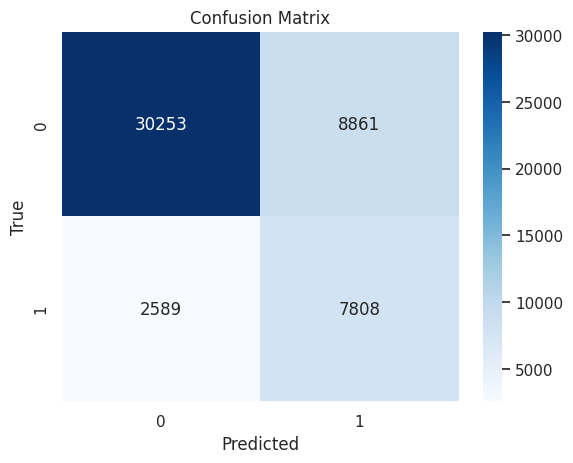

Accuracy: 0.7687
ROC-AUC: 0.7622
F1-Score: 0.5770
Precision: 0.4684
Recall: 0.7510
-----------------


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "XGBoost": XGBClassifier(random_state=1),
    "LightGBM": LGBMClassifier(objective="binary", random_state=1),
    "KNeighbors": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(train_X_resampled, train_y_resampled)
    y_pred = model.predict(test_X)

    accuracy = accuracy_score(test_y, y_pred)
    roc_auc = roc_auc_score(test_y, y_pred)
    precision = precision_score(test_y, y_pred)
    recall = recall_score(test_y, y_pred)
    f1 = f1_score(test_y, y_pred)

    print(f"{name} Results:")
    sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d',
                cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    print("-----------------")

#### ***On model building:***
We evaluated several popular machine learning algorithms for our model building, including:
- Logistic Regression
- Random Forest
- XGBoost
- LightGBM
- K-Nearest Neighbors.

While these algorithms have their technical complexities, we'll focus on their performance based on the chosen metrics.

We carefully selected metrics considering both the business objectives and the characteristics of our dataset. Since we're dealing with a bank churn dataset with an imbalanced target variable (churned vs. non-churned customers), accuracy wouldn't be a reliable metric. It tends to be biased towards the majority class, which in this case, are likely non-churning customers.

Therefore, we opted for **ROC-AUC** (Receiver Operating Characteristic Area Under the Curve) as the primary evaluation metric. ROC-AUC helps us understand how well the model can tell the difference between these two groups (churned vs non-churned), regardless of the specific details used for the prediction. This is crucial, as we want the model to perform well even if the groups are imbalanced.

Furthermore, considering the business objective of predicting customers at risk of leaving the bank, it's essential to prioritize minimizing false negatives. False negatives occur when churned customers are misclassified as non-churning. To address this, we'll also focus on recall as a key metric.

**Recall** measures the model's ability to correctly identify true positives, which in our case, are the churning customers. By prioritizing recall, we aim to minimize the risk of missing critical customers who are on the verge of leaving the bank.

#### ***Findings:***
- After carefully assessing the performance of the models using our priority metrics (ROC-AUC and Recall), we can see that the model that produced the highest values for these metrics, and consequently to other metrics as well, is the **LightBGM** model. With that said, we may proceed to

#### ***Derived Business Insights from our chosen machine learning model:***
- From the confusion matrix generated from the results of the LightGBM model, we can see that out of the 49,511 customer data points in our testing set, 10,397 represent customers who actually churned. Therefore, our initial churn rate is approximately 21%.
- The LightGBM model achieved a recall score of 79.63%. This means the model correctly identified 79.63% of the churned customers.
- The false negative count (customers who actually churned but were not correctly predicted by the model) is 2,118. If we consider the false negatives as the new churned population, our churned ratio becomes 4.3%.
- Consequently, if we deploy this model in the real world, we are projected to reduce the churn rate by 16.7% from the original 21%.
- It's important to note that correctly predicting churned customers is different from successfully retaining them. We still need to identify the factors leading to customer churn and create specialized retention strategies to address these factors.

#### **An attempt on Hyperparameter Tuning**


[LightGBM] [Info] Number of positive: 19619, number of negative: 19619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 858
[LightGBM] [Info] Number of data points in the train set: 39238, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 19619, number of negative: 19619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001558 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 39238, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000

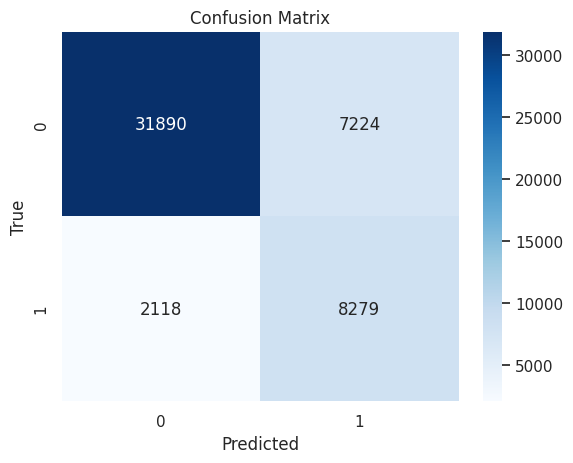

Recall with best hyperparameters: 0.7963


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid = {
    'learning_rate': [0.1, 0.01, 0.05],
    'num_leaves': [31, 64, 127],
}

# Define the LightGBM model
lgb_model = LGBMClassifier(objective='binary')  # Specify binary classification

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='recall')  # Use ROC-AUC as metric

# Fit the model
grid_search.fit(train_X_resampled, train_y_resampled)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions using the best model
y_pred = best_model.predict(test_X)

# roc_auc = roc_auc_score(test_y, y_pred)
# print(f"ROC-AUC with best hyperparameters: {roc_auc:.4f}")

recall = recall_score(test_y, y_pred)
sns.heatmap(confusion_matrix(test_y, y_pred), annot=True, fmt='d',
                cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
print(f"Recall with best hyperparameters: {recall:.4f}")

Not much has changed. Let's disregard this.

---
## ***8 - Machine Learning Explainability***

We talked earlier about how it's important for machine learning models not just to make predictions, but also to explain how they come to those conclusions. This raises two important questions:

- What factors are most important to the model's predictions?
- What patterns does the model see in the data that helps it make its predictions?

Imagine a bank that can predict which customers are most likely to exit/quit (also called "churn"). While this prediction is helpful, it's even more valuable to understand why these customers might leave. This is where machine learning explainability comes in.

Explainability helps us uncover the hidden reasons behind the model's predictions. It allows us to see which factors, like low account activity or recent service complaints, are most likely to influence a customer's decision to leave.

With this deeper understanding, the bank can develop targeted solutions to address the root causes of customer churn. This could involve offering incentives to low-activity customers, improving customer service, or creating specialized programs for different customer groups.


**Steps:**
- Understand which feature is the most importance through ***Permutation Importance***
- Perform SHAP
---

### Permutation Importance

In [ ]:
perm = PermutationImportance(best_model, random_state=1).fit(test_X, test_y)
eli5.show_weights(perm, feature_names = test_X.columns.tolist())

Weight,Feature
0.1075 ± 0.0027,NumOfProducts
0.0618 ± 0.0009,Age
0.0249 ± 0.0021,Balance
0.0209 ± 0.0023,IsActiveMember
0.0065 ± 0.0014,gender_encoded
0.0013 ± 0.0011,Germany
0.0008 ± 0.0007,HasCrCard
0.0002 ± 0.0012,CreditScore
-0.0001 ± 0.0014,EstimatedSalary
-0.0003 ± 0.0004,Spain


#### ***Permurtation Importance Interpretation***
- The result is pretty much self-explanatory. Permutation Importance has found NumOfProducts, Age, Balance, and IsActiveMember as the most important features of the dataset.
- This is in consistency with our EDA findings, since we were able to uncover that these features actually affects our Target variable.

### SHAP

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model)

# Calculate Shap values
shap_values = explainer(test_X)

In [ ]:
np.shape(shap_values)

(49511, 12, 2)

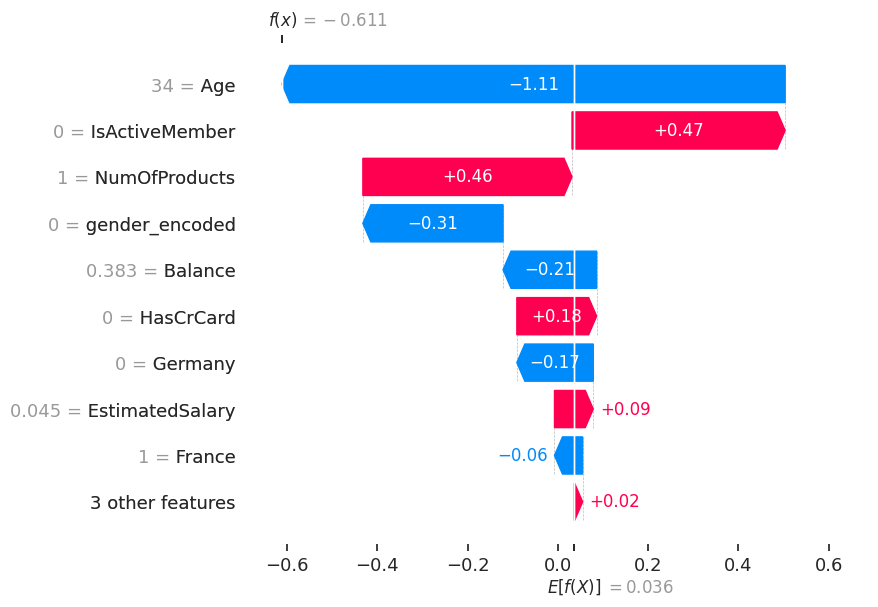

In [ ]:
exp = shap.Explanation(shap_values.values[:,:,1],
                  shap_values.base_values[:,1],
                  data=test_X.values,
                  feature_names=test_X.columns)
idx = 11
shap.plots.waterfall(exp[idx])

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


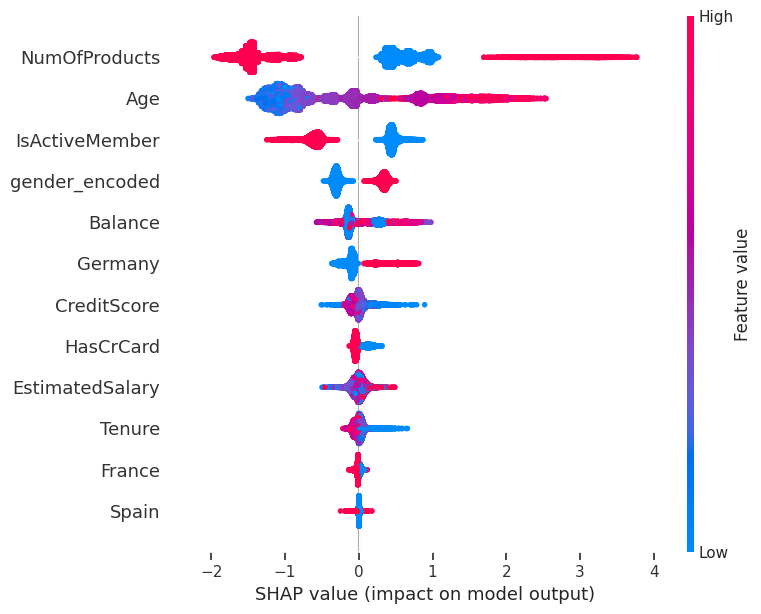

In [ ]:
# Make plot. Index of [1] is explained in text below.
shap_values = explainer.shap_values(test_X)
shap.summary_plot(shap_values[1], test_X)

In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(best_model, test_X)

# Calculate Shap values
shap_values = explainer(test_X)


100%|===================| 49352/49511 [03:42<00:00]       

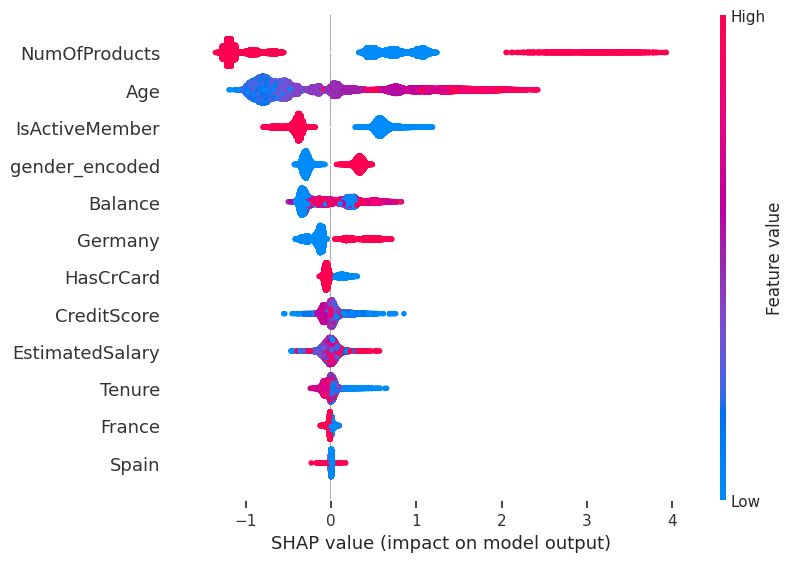

In [ ]:
shap.plots.beeswarm(shap_values, max_display=20)

#### ***SHAP Interpretation***

- For the SHAP result, we are going to cross-verify our findings during the Exploratory Data Analysis portion of this project.

On Number of Products
- The SHAP beeswarm plot confirms our initial findings. Customers with higher number of bank product contributes positively to the SHAP value. When we say it contributes positively, it simply means that it contributes to the prediction that a customer will exit.

On Age
- The SHAP beeswarm plot also confirms that older customers are more likely to get churned. Higher values for age contributes positively to the SHAP value.

On Customer Activity
- Inactive customers contributes positively to the SHAP value. This supports our EDA findings.

On Balance
- Customer with higher balances tends positively affects the SHAP value. This is in consistent with our EDA findings.

On German Customers
- A customer being German positively affects the SHAP value. This is also in consistent with our EDA findings.

On Gender
- Female customers (encoded as 1) positively affects the SHAP value. Male customers (encoded as 0) negatively affects the SHAP value. Again, this is in consistency with our EDA findings.

On other features:
- The impact of other features may be irrelevant/something that we cannot support through our Data Analysis. This is some advance patterns uncovered by the algorithm that we choose.

> Note: Nonetheless, most of our findings during the EDA is consistent with our model. This may be enough for clients to trust this model in creating business decisions for us.

---
## ***Acknowledgments***

First and foremost, I would like to thank our data donor, whoever they may be, for providing this dataset.

Secondly, I would like to thank my On-the-Job Training (OJT) supervisors, Ms. Myra and Ms. Krizzy, for their guidance throughout this project. I started with little to no knowledge in data science project workflow, and now I can confidently say that I can do basic data science tasks!

Finally, I would like to thank the Kaggle community for the series of courses that allowed me to achieve this. Thank you for sharing your knowledge with newcomers like me!

### ***End notes:***
> This is a beginner's project, and many of the processes here can still be improved. I welcome feedback and suggestions for improvement to further enhance the quality of this project.

---